## Exploratory analysis on the result of dge_MAST function

- dge_MAST function returns a list of genes with p-values, z-scores, etc.

In this notebook, we will grab the result of the dge_MAST function on XAUT1-Blood object (for each pair of conditions), then do the downstream analyses.

For this, we can refer to the analyses and visualization methods used in CTA paper.


In [227]:
import pandas as pd
import scanpy as sc
import anndata as ad
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams.update(mpl.rcParamsDefault) #Reset rcParams to default
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']  # Colors in this style

# Plotting style function (run this before plotting the final figure)
def set_plotting_style():
    plt.style.use('seaborn-paper')
    plt.rc('axes', labelsize=12)
    plt.rc('axes', titlesize=12)
    plt.rc('xtick', labelsize=10)
    plt.rc('ytick', labelsize=10)
    plt.rc('legend', fontsize=10)
    plt.rc('text.latex', preamble=r'\usepackage{sfmath}')
    plt.rc('xtick.major', pad=2)
    plt.rc('ytick.major', pad=2)
    plt.rc('mathtext', fontset='stixsans', sf='sansserif')
    plt.rc('figure', figsize=[10,9])
    plt.rc('svg', fonttype='none')

In [72]:
adata = sc.read_h5ad('/mnt/ibm_lg/yangjoon.kim/UC_UCSF_Multiome/MAST/XAUT1_blood_RNA_220613.h5ad')
adata

AnnData object with n_obs × n_vars = 20130 × 22741
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'NUM.SNPS', 'NUM.READS', 'DROPLET.TYPE', 'BEST.GUESS', 'percent.mt', 'percent.ribo', 'S.Score', 'G2M.Score', 'Phase', 'SAMPLE.by.SNPs', 'nCount_SCT', 'nFeature_SCT', 'DF.DROPLET.TYPE', 'LIBRARY', 'RNA_snn_res.0.2', 'seurat_clusters', 'louvain_res0.2', 'RNA_snn_res.0.4', 'louvain_res0.4', 'RNA_snn_res.0.6', 'louvain_res0.6', 'RNA_snn_res.0.8', 'louvain_res0.8', 'RNA_snn_res.1', 'louvain_res1', 'RNA_snn_res.1.2', 'louvain_res1.2', 'RNA_snn_res.1.4', 'louvain_res1.4', 'RNA_snn_res.1.6', 'louvain_res1.6', 'RNA_snn_res.1.8', 'louvain_res1.8', 'RNA_snn_res.2', 'louvain_res2', 'CoLabs_ID', 'CoLabs_patient', 'condition', 'coarse_annotations', 'fine_annotations', 'MK final coarse_V2', 'MK final fine annotations_V2', 'MK final coarse_V2 a4B7', 'MK final fine annotations_V2 a4B7', 'coarse', 'fine'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.va

In [65]:
adata.obs["coarse"].unique().to_list()

['07_gd T cells',
 '02_Plasmablasts',
 '03_CD4 T',
 '06_CD8 T',
 '09_CD14 classical monocytes',
 '10_CD16 Nonclassical monocytes',
 '08_NK',
 '13_Platelets',
 '04_Treg',
 '14_Erythrocytes',
 '01_B',
 '05_MAIT',
 '12_pDC and ASDC',
 '11_DC',
 '15_Cycling']

In [73]:
df_XAUT1_Blood_coarse = pd.read_csv('/mnt/ibm_lg/yangjoon.kim/UC_UCSF_Multiome/MAST/result/XAUT1_Blood_condition_all_celltypes_DGE_coarse_MAST.csv')
df_XAUT1_Blood_coarse

,gene,pval,log2fc,cell_type,tissue,method,covariate
0,ALOX5AP,0.000348,-4.526211,07_gd T cells,XAUT1_Blood_HC_UCNB,MAST,ngenes
1,GZMH,0.028953,2.575342,07_gd T cells,XAUT1_Blood_HC_UCNB,MAST,ngenes
2,HLA-B,0.001790,-0.927382,07_gd T cells,XAUT1_Blood_HC_UCNB,MAST,ngenes
3,IL7R,0.000004,-5.616784,07_gd T cells,XAUT1_Blood_HC_UCNB,MAST,ngenes
4,KLRC1,0.000296,-4.828989,07_gd T cells,XAUT1_Blood_HC_UCNB,MAST,ngenes
...,...,...,...,...,...,...,...
1120,CTSW,0.013054,-2.841090,05_MAIT,XAUT1_Blood_UCV_UCNB,MAST,ngenes
1121,IFITM3,0.000006,3.526953,05_MAIT,XAUT1_Blood_UCV_UCNB,MAST,ngenes
1122,MTND1P23,0.000026,2.040210,05_MAIT,XAUT1_Blood_UCV_UCNB,MAST,ngenes
1123,RPS2P5,0.013054,2.924478,05_MAIT,XAUT1_Blood_UCV_UCNB,MAST,ngenes


In [74]:
array_cell_types = df_XAUT1_Blood_coarse['cell_type'].unique()
array_cell_types

array(['07_gd T cells', '03_CD4 T', '09_CD14 classical monocytes',
       '08_NK', '01_B', '05_MAIT', '10_CD16 Nonclassical monocytes',
       '06_CD8 T', '11_DC', '04_Treg', '13_Platelets', '14_Erythrocytes'],
      dtype=object)

In [75]:
df_XAUT1_Blood_coarse.head()

,gene,pval,log2fc,cell_type,tissue,method,covariate
0,ALOX5AP,0.000348,-4.526211,07_gd T cells,XAUT1_Blood_HC_UCNB,MAST,ngenes
1,GZMH,0.028953,2.575342,07_gd T cells,XAUT1_Blood_HC_UCNB,MAST,ngenes
2,HLA-B,0.001790,-0.927382,07_gd T cells,XAUT1_Blood_HC_UCNB,MAST,ngenes
3,IL7R,0.000004,-5.616784,07_gd T cells,XAUT1_Blood_HC_UCNB,MAST,ngenes
4,KLRC1,0.000296,-4.828989,07_gd T cells,XAUT1_Blood_HC_UCNB,MAST,ngenes


## Analysis by cell type class

For each pair of conditions, check which cell-types have more differentially expressed genes.

### (1) HC vs UCNB

In [76]:
# First, let's subset the anndata for pairs of conditions
# HC vs UCNB
df_XAUT1_Blood_coarse_HC_UCNB = df_XAUT1_Blood_coarse[df_XAUT1_Blood_coarse["tissue"]=="XAUT1_Blood_HC_UCNB"]
df_XAUT1_Blood_coarse_HC_UCNB

,gene,pval,log2fc,cell_type,tissue,method,covariate
0,ALOX5AP,3.476082e-04,-4.526211,07_gd T cells,XAUT1_Blood_HC_UCNB,MAST,ngenes
1,GZMH,2.895342e-02,2.575342,07_gd T cells,XAUT1_Blood_HC_UCNB,MAST,ngenes
2,HLA-B,1.789621e-03,-0.927382,07_gd T cells,XAUT1_Blood_HC_UCNB,MAST,ngenes
3,IL7R,3.549960e-06,-5.616784,07_gd T cells,XAUT1_Blood_HC_UCNB,MAST,ngenes
4,KLRC1,2.956925e-04,-4.828989,07_gd T cells,XAUT1_Blood_HC_UCNB,MAST,ngenes
...,...,...,...,...,...,...,...
278,TSC22D3,1.620073e-02,-0.877302,06_CD8 T,XAUT1_Blood_HC_UCNB,MAST,ngenes
279,TXNIP,6.250345e-08,-0.736698,06_CD8 T,XAUT1_Blood_HC_UCNB,MAST,ngenes
280,XCL1,9.566442e-11,-0.716326,06_CD8 T,XAUT1_Blood_HC_UCNB,MAST,ngenes
281,ZNF683,1.758964e-10,0.619338,06_CD8 T,XAUT1_Blood_HC_UCNB,MAST,ngenes


In [77]:
array_cell_types = df_XAUT1_Blood_coarse_HC_UCNB["cell_type"].unique()
array_cell_types[0]

'07_gd T cells'

In [49]:
abs(1)

1

In [459]:
num_DEG_per_cell_type = []
# define the list of cell-types
list_cell_types = df_XAUT1_Blood_coarse_HC_UCNB["cell_type"].unique()
num_cell_types = len(list_cell_types)

for i in range(0,num_cell_types):
    cell_type = list_cell_types[i]
    df_subset = df_XAUT1_Blood_coarse_HC_UCNB[df_XAUT1_Blood_coarse_HC_UCNB["cell_type"]==cell_type]
    #df_subset = df_subset[abs(df_subset["log2fc"])>2]
    num_DEG = len(df_subset)
    num_DEG_per_cell_type.append(num_DEG)


<AxesSubplot:>

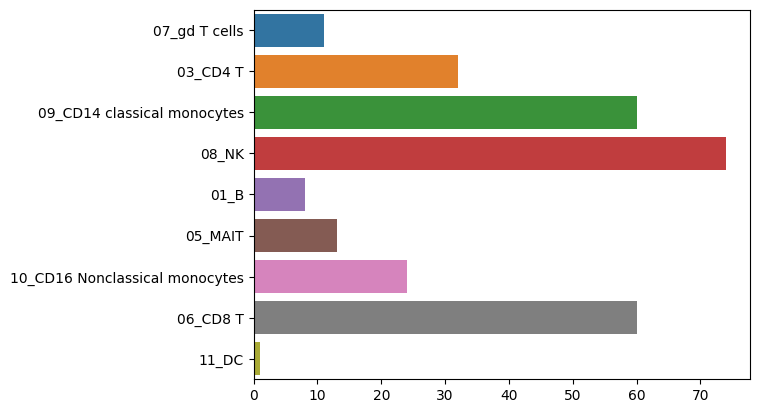

In [460]:
num_DEG_per_cell_type

sns.barplot(y=list_cell_types, x=num_DEG_per_cell_type)

### (2) HC vs UCV

In [80]:
# HC vs UCV
df_XAUT1_Blood_coarse_HC_UCV = df_XAUT1_Blood_coarse[df_XAUT1_Blood_coarse["tissue"]=="XAUT1_Blood_HC_UCV"]
df_XAUT1_Blood_coarse_HC_UCV

,gene,pval,log2fc,cell_type,tissue,method,covariate
283,FOS,2.491134e-02,3.061046,07_gd T cells,XAUT1_Blood_HC_UCV,MAST,ngenes
284,HLA-B,1.706125e-09,-1.238576,07_gd T cells,XAUT1_Blood_HC_UCV,MAST,ngenes
285,IFITM3,1.941915e-14,5.956415,07_gd T cells,XAUT1_Blood_HC_UCV,MAST,ngenes
286,SMDT1,3.369703e-03,-3.063024,07_gd T cells,XAUT1_Blood_HC_UCV,MAST,ngenes
287,AHNAK,2.442384e-02,-0.819658,03_CD4 T,XAUT1_Blood_HC_UCV,MAST,ngenes
...,...,...,...,...,...,...,...
720,CDKN1A,2.385824e-03,3.094349,13_Platelets,XAUT1_Blood_HC_UCV,MAST,ngenes
721,RPL14,4.772840e-02,-4.213917,13_Platelets,XAUT1_Blood_HC_UCV,MAST,ngenes
722,RPL3,1.092173e-02,-4.674728,13_Platelets,XAUT1_Blood_HC_UCV,MAST,ngenes
723,RPL34,3.535136e-03,-4.176022,13_Platelets,XAUT1_Blood_HC_UCV,MAST,ngenes


<AxesSubplot:>

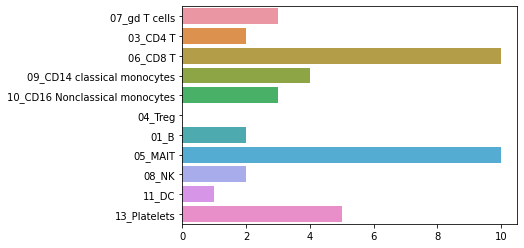

In [123]:
num_DEG_per_cell_type = []
# define the list of cell-types
list_cell_types = df_XAUT1_Blood_coarse_HC_UCV["cell_type"].unique()
num_cell_types = len(list_cell_types)

for i in range(0,num_cell_types):
    cell_type = list_cell_types[i]
    df_subset = df_XAUT1_Blood_coarse_HC_UCV[df_XAUT1_Blood_coarse_HC_UCV["cell_type"]==cell_type]
    df_subset = df_subset[abs(df_subset["log2fc"])>2]
    num_DEG = len(df_subset)
    num_DEG_per_cell_type.append(num_DEG)

num_DEG_per_cell_type

sns.barplot(y=list_cell_types, x=num_DEG_per_cell_type)

### (3) UCNB vs UCV

In [82]:
# UCNB vs UCV
df_XAUT1_Blood_coarse_UCV_UCNB = df_XAUT1_Blood_coarse[df_XAUT1_Blood_coarse["tissue"]=="XAUT1_Blood_UCV_UCNB"]
df_XAUT1_Blood_coarse_UCV_UCNB

,gene,pval,log2fc,cell_type,tissue,method,covariate
725,AC006369.2,1.660271e-07,-0.861714,06_CD8 T,XAUT1_Blood_UCV_UCNB,MAST,ngenes
726,ACTG1,6.074517e-11,0.904841,06_CD8 T,XAUT1_Blood_UCV_UCNB,MAST,ngenes
727,ACTR3,3.779647e-02,0.639015,06_CD8 T,XAUT1_Blood_UCV_UCNB,MAST,ngenes
728,ADAM8,1.268127e-03,0.632770,06_CD8 T,XAUT1_Blood_UCV_UCNB,MAST,ngenes
729,ADGRG1,1.020145e-05,1.093138,06_CD8 T,XAUT1_Blood_UCV_UCNB,MAST,ngenes
...,...,...,...,...,...,...,...
1120,CTSW,1.305445e-02,-2.841090,05_MAIT,XAUT1_Blood_UCV_UCNB,MAST,ngenes
1121,IFITM3,5.583396e-06,3.526953,05_MAIT,XAUT1_Blood_UCV_UCNB,MAST,ngenes
1122,MTND1P23,2.638960e-05,2.040210,05_MAIT,XAUT1_Blood_UCV_UCNB,MAST,ngenes
1123,RPS2P5,1.305445e-02,2.924478,05_MAIT,XAUT1_Blood_UCV_UCNB,MAST,ngenes


In [297]:
df_XAUT1_Blood_coarse_UCV_UCNB.sort_values('log2fc')

,gene,gene_cell_type_pair,gene_cell_type_pair,pval,log2fc,cell_type,tissue,method,covariate
982,TRBC2,TRBC2-07_gd T cells,TRBC2-07_gd T cells,1.428349e-02,-4.505869,07_gd T cells,XAUT1_Blood_UCV_UCNB,MAST,ngenes
1034,MYOM2,MYOM2-08_NK,MYOM2-08_NK,5.979796e-80,-3.876997,08_NK,XAUT1_Blood_UCV_UCNB,MAST,ngenes
983,TRDV1,TRDV1-07_gd T cells,TRDV1-07_gd T cells,8.976221e-04,-3.730518,07_gd T cells,XAUT1_Blood_UCV_UCNB,MAST,ngenes
1104,RPS26,RPS26-14_Erythrocytes,RPS26-14_Erythrocytes,2.477573e-04,-3.132864,14_Erythrocytes,XAUT1_Blood_UCV_UCNB,MAST,ngenes
1120,CTSW,CTSW-05_MAIT,CTSW-05_MAIT,1.305445e-02,-2.841090,05_MAIT,XAUT1_Blood_UCV_UCNB,MAST,ngenes
...,...,...,...,...,...,...,...,...,...
1121,IFITM3,IFITM3-05_MAIT,IFITM3-05_MAIT,5.583396e-06,3.526953,05_MAIT,XAUT1_Blood_UCV_UCNB,MAST,ngenes
1116,RPS4Y1,RPS4Y1-01_B,RPS4Y1-01_B,1.459259e-23,3.552897,01_B,XAUT1_Blood_UCV_UCNB,MAST,ngenes
959,TMEM176B,TMEM176B-09_CD14 classical monocytes,TMEM176B-09_CD14 classical monocytes,2.428240e-93,3.588474,09_CD14 classical monocytes,XAUT1_Blood_UCV_UCNB,MAST,ngenes
981,KLRC1,KLRC1-07_gd T cells,KLRC1-07_gd T cells,1.775979e-02,3.856565,07_gd T cells,XAUT1_Blood_UCV_UCNB,MAST,ngenes


In [125]:
df_XAUT1_Blood_coarse_UCV_UCNB[abs(df_XAUT1_Blood_coarse_UCV_UCNB["log2fc"])>2]

,gene,pval,log2fc,cell_type,tissue,method,covariate
760,DUSP2,3.417643e-23,-2.218306,06_CD8 T,XAUT1_Blood_UCV_UCNB,MAST,ngenes
765,FGFBP2,5.958688e-19,2.169473,06_CD8 T,XAUT1_Blood_UCV_UCNB,MAST,ngenes
767,FOS,1.827610e-17,-2.138951,06_CD8 T,XAUT1_Blood_UCV_UCNB,MAST,ngenes
772,GNLY,1.006024e-30,2.837966,06_CD8 T,XAUT1_Blood_UCV_UCNB,MAST,ngenes
774,GZMB,3.677018e-17,2.006799,06_CD8 T,XAUT1_Blood_UCV_UCNB,MAST,ngenes
776,GZMK,1.931335e-21,-2.299480,06_CD8 T,XAUT1_Blood_UCV_UCNB,MAST,ngenes
793,ITGB1,2.390393e-20,2.082216,06_CD8 T,XAUT1_Blood_UCV_UCNB,MAST,ngenes
813,MT2A,6.847384e-17,2.050377,06_CD8 T,XAUT1_Blood_UCV_UCNB,MAST,ngenes
845,RPS4Y1,1.594567e-52,3.492328,06_CD8 T,XAUT1_Blood_UCV_UCNB,MAST,ngenes
889,ZNF683,1.956025e-34,2.041657,06_CD8 T,XAUT1_Blood_UCV_UCNB,MAST,ngenes


<AxesSubplot:>

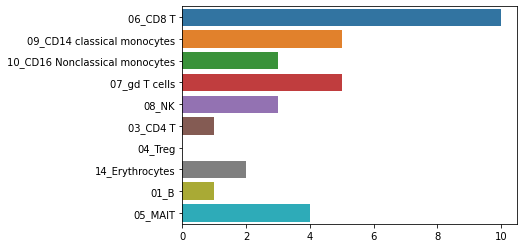

In [124]:
num_DEG_per_cell_type = []
# define the list of cell-types
list_cell_types = df_XAUT1_Blood_coarse_UCV_UCNB["cell_type"].unique()
num_cell_types = len(list_cell_types)

for i in range(0,num_cell_types):
    cell_type = list_cell_types[i]
    df_subset = df_XAUT1_Blood_coarse_UCV_UCNB[df_XAUT1_Blood_coarse_UCV_UCNB["cell_type"]==cell_type]
    df_subset = df_subset[abs(df_subset["log2fc"])>2]
    num_DEG = len(df_subset)
    num_DEG_per_cell_type.append(num_DEG)

num_DEG_per_cell_type

sns.barplot(y=list_cell_types, x=num_DEG_per_cell_type)

## Volcano plot for DGE visualization

In [33]:
df_XAUT1_Blood_coarse_HC_UCNB

,gene,pval,log2fc,cell_type,tissue,method,covariate
0,ALOX5AP,3.476082e-04,-4.526211,07_gd T cells,XAUT1_Blood_HC_UCNB,MAST,ngenes
1,GZMH,2.895342e-02,2.575342,07_gd T cells,XAUT1_Blood_HC_UCNB,MAST,ngenes
2,HLA-B,1.789621e-03,-0.927382,07_gd T cells,XAUT1_Blood_HC_UCNB,MAST,ngenes
3,IL7R,3.549960e-06,-5.616784,07_gd T cells,XAUT1_Blood_HC_UCNB,MAST,ngenes
4,KLRC1,2.956925e-04,-4.828989,07_gd T cells,XAUT1_Blood_HC_UCNB,MAST,ngenes
...,...,...,...,...,...,...,...
278,TSC22D3,1.620073e-02,-0.877302,06_CD8 T,XAUT1_Blood_HC_UCNB,MAST,ngenes
279,TXNIP,6.250345e-08,-0.736698,06_CD8 T,XAUT1_Blood_HC_UCNB,MAST,ngenes
280,XCL1,9.566442e-11,-0.716326,06_CD8 T,XAUT1_Blood_HC_UCNB,MAST,ngenes
281,ZNF683,1.758964e-10,0.619338,06_CD8 T,XAUT1_Blood_HC_UCNB,MAST,ngenes


In [36]:
df_XAUT1_Blood_coarse_HC_UCNB["-log10_pval"] = -np.log10(df_XAUT1_Blood_coarse_HC_UCNB["pval"])

/tmp/ipykernel_763752/49270066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_XAUT1_Blood_coarse_HC_UCNB["-log10_pval"] = -np.log10(df_XAUT1_Blood_coarse_HC_UCNB["pval"])


In [37]:
df_XAUT1_Blood_coarse_HC_UCNB

,gene,pval,log2fc,cell_type,tissue,method,covariate,-log10_pval
0,ALOX5AP,3.476082e-04,-4.526211,07_gd T cells,XAUT1_Blood_HC_UCNB,MAST,ngenes,3.458910
1,GZMH,2.895342e-02,2.575342,07_gd T cells,XAUT1_Blood_HC_UCNB,MAST,ngenes,1.538300
2,HLA-B,1.789621e-03,-0.927382,07_gd T cells,XAUT1_Blood_HC_UCNB,MAST,ngenes,2.747239
3,IL7R,3.549960e-06,-5.616784,07_gd T cells,XAUT1_Blood_HC_UCNB,MAST,ngenes,5.449776
4,KLRC1,2.956925e-04,-4.828989,07_gd T cells,XAUT1_Blood_HC_UCNB,MAST,ngenes,3.529160
...,...,...,...,...,...,...,...,...
278,TSC22D3,1.620073e-02,-0.877302,06_CD8 T,XAUT1_Blood_HC_UCNB,MAST,ngenes,1.790465
279,TXNIP,6.250345e-08,-0.736698,06_CD8 T,XAUT1_Blood_HC_UCNB,MAST,ngenes,7.204096
280,XCL1,9.566442e-11,-0.716326,06_CD8 T,XAUT1_Blood_HC_UCNB,MAST,ngenes,10.019250
281,ZNF683,1.758964e-10,0.619338,06_CD8 T,XAUT1_Blood_HC_UCNB,MAST,ngenes,9.754743


In [71]:
# example volcano plot

from bioinfokit import analys, visuz
## load dataset as pandas dataframe
#df = analys.get_data('volcano').data
#df.head(2)

# visuz.GeneExpression.volcano(df=df, lfc='log2FC', pv='p-value',show=True)

In [225]:
help (visuz.GeneExpression.volcano)

Help on function volcano in module bioinfokit.visuz:

volcano(df='dataframe', lfc=None, pv=None, lfc_thr=(1, 1), pv_thr=(0.05, 0.05), color=('green', 'grey', 'red'), valpha=1, geneid=None, genenames=None, gfont=8, dim=(5, 5), r=300, ar=90, dotsize=8, markerdot='o', sign_line=False, gstyle=1, show=False, figtype='png', axtickfontsize=9, axtickfontname='Arial', axlabelfontsize=9, axlabelfontname='Arial', axxlabel=None, axylabel=None, xlm=None, ylm=None, plotlegend=False, legendpos='best', figname='volcano', legendanchor=None, legendlabels=['significant up', 'not significant', 'significant down'], theme=None)



## Volcano plots aggregating the DEGs from all cell-types

We will make one volcano plot for each pair of conditions, aggregating all differentially expressed genes across all cell-types. Therefore, there could be duplicates for some genes from different cell-types. So, we will make a pair of (gene, cell-type) to label in the volcano plots.

In [ ]:
# # add gene customized labels
# # note: here you need to provide column name of gene Ids (geneid parameter)
# # default simple text will be added
# visuz.GeneExpression.volcano(df=df, lfc="log2FC", pv="p-value", geneid="GeneNames",
#     genenames=("LOC_Os09g01000.1", "LOC_Os01g50030.1", "LOC_Os06g40940.3", "LOC_Os03g03720.1") )
# # if you want to label all DEGs defined lfc_thr and pv_thr, set genenames='deg' 

In [254]:
list_pairs = df_XAUT1_Blood_coarse_HC_UCNB["gene"]+"-"+df_XAUT1_Blood_coarse_HC_UCNB["cell_type"]
list_pairs
df_XAUT1_Blood_coarse_HC_UCNB.insert(1, "gene_cell_type_pair", list_pairs, True)

0      ALOX5AP-07_gd T cells
1         GZMH-07_gd T cells
2        HLA-B-07_gd T cells
3         IL7R-07_gd T cells
4        KLRC1-07_gd T cells
               ...          
278         TSC22D3-06_CD8 T
279           TXNIP-06_CD8 T
280            XCL1-06_CD8 T
281          ZNF683-06_CD8 T
282           HLA-DQA2-11_DC
Length: 283, dtype: object

In [262]:
df_XAUT1_Blood_coarse_HC_UCNB = df_XAUT1_Blood_coarse_HC_UCNB.iloc[:,[0,1,6,7,8,9,10,11]]
df_XAUT1_Blood_coarse_HC_UCNB

,gene,gene_cell_type_pair,pval,log2fc,cell_type,tissue,method,covariate
0,ALOX5AP,ALOX5AP-07_gd T cells,3.476082e-04,-4.526211,07_gd T cells,XAUT1_Blood_HC_UCNB,MAST,ngenes
1,GZMH,GZMH-07_gd T cells,2.895342e-02,2.575342,07_gd T cells,XAUT1_Blood_HC_UCNB,MAST,ngenes
2,HLA-B,HLA-B-07_gd T cells,1.789621e-03,-0.927382,07_gd T cells,XAUT1_Blood_HC_UCNB,MAST,ngenes
3,IL7R,IL7R-07_gd T cells,3.549960e-06,-5.616784,07_gd T cells,XAUT1_Blood_HC_UCNB,MAST,ngenes
4,KLRC1,KLRC1-07_gd T cells,2.956925e-04,-4.828989,07_gd T cells,XAUT1_Blood_HC_UCNB,MAST,ngenes
...,...,...,...,...,...,...,...,...
278,TSC22D3,TSC22D3-06_CD8 T,1.620073e-02,-0.877302,06_CD8 T,XAUT1_Blood_HC_UCNB,MAST,ngenes
279,TXNIP,TXNIP-06_CD8 T,6.250345e-08,-0.736698,06_CD8 T,XAUT1_Blood_HC_UCNB,MAST,ngenes
280,XCL1,XCL1-06_CD8 T,9.566442e-11,-0.716326,06_CD8 T,XAUT1_Blood_HC_UCNB,MAST,ngenes
281,ZNF683,ZNF683-06_CD8 T,1.758964e-10,0.619338,06_CD8 T,XAUT1_Blood_HC_UCNB,MAST,ngenes


In [263]:
# Add "gene_cell_type_pair"
list_pairs = df_XAUT1_Blood_coarse_HC_UCV["gene"]+"-"+df_XAUT1_Blood_coarse_HC_UCV["cell_type"]
list_pairs
df_XAUT1_Blood_coarse_HC_UCV.insert(1, "gene_cell_type_pair", list_pairs, True)
df_XAUT1_Blood_coarse_HC_UCV

,gene,gene_cell_type_pair,pval,log2fc,cell_type,tissue,method,covariate,gene_cell_type_pair
283,FOS,FOS-07_gd T cells,2.491134e-02,3.061046,07_gd T cells,XAUT1_Blood_HC_UCV,MAST,ngenes,FOS-07_gd T cells
284,HLA-B,HLA-B-07_gd T cells,1.706125e-09,-1.238576,07_gd T cells,XAUT1_Blood_HC_UCV,MAST,ngenes,HLA-B-07_gd T cells
285,IFITM3,IFITM3-07_gd T cells,1.941915e-14,5.956415,07_gd T cells,XAUT1_Blood_HC_UCV,MAST,ngenes,IFITM3-07_gd T cells
286,SMDT1,SMDT1-07_gd T cells,3.369703e-03,-3.063024,07_gd T cells,XAUT1_Blood_HC_UCV,MAST,ngenes,SMDT1-07_gd T cells
287,AHNAK,AHNAK-03_CD4 T,2.442384e-02,-0.819658,03_CD4 T,XAUT1_Blood_HC_UCV,MAST,ngenes,AHNAK-03_CD4 T
...,...,...,...,...,...,...,...,...,...
720,CDKN1A,CDKN1A-13_Platelets,2.385824e-03,3.094349,13_Platelets,XAUT1_Blood_HC_UCV,MAST,ngenes,CDKN1A-13_Platelets
721,RPL14,RPL14-13_Platelets,4.772840e-02,-4.213917,13_Platelets,XAUT1_Blood_HC_UCV,MAST,ngenes,RPL14-13_Platelets
722,RPL3,RPL3-13_Platelets,1.092173e-02,-4.674728,13_Platelets,XAUT1_Blood_HC_UCV,MAST,ngenes,RPL3-13_Platelets
723,RPL34,RPL34-13_Platelets,3.535136e-03,-4.176022,13_Platelets,XAUT1_Blood_HC_UCV,MAST,ngenes,RPL34-13_Platelets


In [265]:
df_XAUT1_Blood_coarse_HC_UCV = df_XAUT1_Blood_coarse_HC_UCV.iloc[:,0:-1]
df_XAUT1_Blood_coarse_HC_UCV

,gene,gene_cell_type_pair,pval,log2fc,cell_type,tissue,method,covariate
283,FOS,FOS-07_gd T cells,2.491134e-02,3.061046,07_gd T cells,XAUT1_Blood_HC_UCV,MAST,ngenes
284,HLA-B,HLA-B-07_gd T cells,1.706125e-09,-1.238576,07_gd T cells,XAUT1_Blood_HC_UCV,MAST,ngenes
285,IFITM3,IFITM3-07_gd T cells,1.941915e-14,5.956415,07_gd T cells,XAUT1_Blood_HC_UCV,MAST,ngenes
286,SMDT1,SMDT1-07_gd T cells,3.369703e-03,-3.063024,07_gd T cells,XAUT1_Blood_HC_UCV,MAST,ngenes
287,AHNAK,AHNAK-03_CD4 T,2.442384e-02,-0.819658,03_CD4 T,XAUT1_Blood_HC_UCV,MAST,ngenes
...,...,...,...,...,...,...,...,...
720,CDKN1A,CDKN1A-13_Platelets,2.385824e-03,3.094349,13_Platelets,XAUT1_Blood_HC_UCV,MAST,ngenes
721,RPL14,RPL14-13_Platelets,4.772840e-02,-4.213917,13_Platelets,XAUT1_Blood_HC_UCV,MAST,ngenes
722,RPL3,RPL3-13_Platelets,1.092173e-02,-4.674728,13_Platelets,XAUT1_Blood_HC_UCV,MAST,ngenes
723,RPL34,RPL34-13_Platelets,3.535136e-03,-4.176022,13_Platelets,XAUT1_Blood_HC_UCV,MAST,ngenes


In [267]:
# Add "gene_cell_type_pair"
list_pairs = df_XAUT1_Blood_coarse_UCV_UCNB["gene"]+"-"+df_XAUT1_Blood_coarse_UCV_UCNB["cell_type"]
list_pairs
df_XAUT1_Blood_coarse_UCV_UCNB.insert(1, "gene_cell_type_pair", list_pairs, True)

df_XAUT1_Blood_coarse_UCV_UCNB = df_XAUT1_Blood_coarse_UCV_UCNB.iloc[:,0:-1]
df_XAUT1_Blood_coarse_UCV_UCNB

,gene,gene_cell_type_pair,gene_cell_type_pair,pval,log2fc,cell_type,tissue,method
725,AC006369.2,AC006369.2-06_CD8 T,AC006369.2-06_CD8 T,1.660271e-07,-0.861714,06_CD8 T,XAUT1_Blood_UCV_UCNB,MAST
726,ACTG1,ACTG1-06_CD8 T,ACTG1-06_CD8 T,6.074517e-11,0.904841,06_CD8 T,XAUT1_Blood_UCV_UCNB,MAST
727,ACTR3,ACTR3-06_CD8 T,ACTR3-06_CD8 T,3.779647e-02,0.639015,06_CD8 T,XAUT1_Blood_UCV_UCNB,MAST
728,ADAM8,ADAM8-06_CD8 T,ADAM8-06_CD8 T,1.268127e-03,0.632770,06_CD8 T,XAUT1_Blood_UCV_UCNB,MAST
729,ADGRG1,ADGRG1-06_CD8 T,ADGRG1-06_CD8 T,1.020145e-05,1.093138,06_CD8 T,XAUT1_Blood_UCV_UCNB,MAST
...,...,...,...,...,...,...,...,...
1120,CTSW,CTSW-05_MAIT,CTSW-05_MAIT,1.305445e-02,-2.841090,05_MAIT,XAUT1_Blood_UCV_UCNB,MAST
1121,IFITM3,IFITM3-05_MAIT,IFITM3-05_MAIT,5.583396e-06,3.526953,05_MAIT,XAUT1_Blood_UCV_UCNB,MAST
1122,MTND1P23,MTND1P23-05_MAIT,MTND1P23-05_MAIT,2.638960e-05,2.040210,05_MAIT,XAUT1_Blood_UCV_UCNB,MAST
1123,RPS2P5,RPS2P5-05_MAIT,RPS2P5-05_MAIT,1.305445e-02,2.924478,05_MAIT,XAUT1_Blood_UCV_UCNB,MAST


In [269]:
df_XAUT1_Blood_coarse_UCV_UCNB["covariate"] = "ngenes"

In [270]:
df_XAUT1_Blood_coarse_UCV_UCNB

,gene,gene_cell_type_pair,gene_cell_type_pair,pval,log2fc,cell_type,tissue,method,covariate
725,AC006369.2,AC006369.2-06_CD8 T,AC006369.2-06_CD8 T,1.660271e-07,-0.861714,06_CD8 T,XAUT1_Blood_UCV_UCNB,MAST,ngenes
726,ACTG1,ACTG1-06_CD8 T,ACTG1-06_CD8 T,6.074517e-11,0.904841,06_CD8 T,XAUT1_Blood_UCV_UCNB,MAST,ngenes
727,ACTR3,ACTR3-06_CD8 T,ACTR3-06_CD8 T,3.779647e-02,0.639015,06_CD8 T,XAUT1_Blood_UCV_UCNB,MAST,ngenes
728,ADAM8,ADAM8-06_CD8 T,ADAM8-06_CD8 T,1.268127e-03,0.632770,06_CD8 T,XAUT1_Blood_UCV_UCNB,MAST,ngenes
729,ADGRG1,ADGRG1-06_CD8 T,ADGRG1-06_CD8 T,1.020145e-05,1.093138,06_CD8 T,XAUT1_Blood_UCV_UCNB,MAST,ngenes
...,...,...,...,...,...,...,...,...,...
1120,CTSW,CTSW-05_MAIT,CTSW-05_MAIT,1.305445e-02,-2.841090,05_MAIT,XAUT1_Blood_UCV_UCNB,MAST,ngenes
1121,IFITM3,IFITM3-05_MAIT,IFITM3-05_MAIT,5.583396e-06,3.526953,05_MAIT,XAUT1_Blood_UCV_UCNB,MAST,ngenes
1122,MTND1P23,MTND1P23-05_MAIT,MTND1P23-05_MAIT,2.638960e-05,2.040210,05_MAIT,XAUT1_Blood_UCV_UCNB,MAST,ngenes
1123,RPS2P5,RPS2P5-05_MAIT,RPS2P5-05_MAIT,1.305445e-02,2.924478,05_MAIT,XAUT1_Blood_UCV_UCNB,MAST,ngenes


In [237]:
# # create an annotation column for (gene,cell_type) pairs
# df_XAUT1_Blood_coarse_HC_UCNB["gene_cell_type_pair"] = df_XAUT1_Blood_coarse_HC_UCNB["gene"]+"-"+df_XAUT1_Blood_coarse_HC_UCNB["cell_type"]
# df_XAUT1_Blood_coarse_HC_UCV["gene_cell_type_pair"] = df_XAUT1_Blood_coarse_HC_UCV["gene"]+"-"+df_XAUT1_Blood_coarse_HC_UCV["cell_type"]
# df_XAUT1_Blood_coarse_UCV_UCNB["gene_cell_type_pair"] = df_XAUT1_Blood_coarse_UCV_UCNB["gene"]+"-"+df_XAUT1_Blood_coarse_UCV_UCNB["cell_type"]

/tmp/ipykernel_763752/1650868177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_XAUT1_Blood_coarse_HC_UCNB["gene_cell_type_pair"] = df_XAUT1_Blood_coarse_HC_UCNB["gene"]+"-"+df_XAUT1_Blood_coarse_HC_UCNB["cell_type"]
/tmp/ipykernel_763752/1650868177.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_XAUT1_Blood_coarse_HC_UCV["gene_cell_type_pair"] = df_XAUT1_Blood_coarse_HC_UCV["gene"]+"-"+df_XAUT1_Blood_coarse_HC_UCV["cell_type"]
/tmp/ipykernel_763752/1650868177.py:4: SettingWithCopyWarning: 
A

### (1) volcano plot for HC vs UCNB

- abs(log2FC)>2
- p-value<0.05

We need to filter the dataframe of DEG for this to label the "significantly different" genes.


In [277]:
# filter the dataframe of DEG
list_sig_DEGs = df_XAUT1_Blood_coarse_HC_UCNB[(abs(df_XAUT1_Blood_coarse_HC_UCNB["log2fc"])>2) & (df_XAUT1_Blood_coarse_HC_UCNB["pval"]<0.05)]["gene_cell_type_pair"]
list_sig_DEGs = list_sig_DEGs.to_list()
list_sig_DEGs

['ALOX5AP-07_gd T cells',
 'GZMH-07_gd T cells',
 'IL7R-07_gd T cells',
 'KLRC1-07_gd T cells',
 'RER1-07_gd T cells',
 'TRDV1-07_gd T cells',
 'TRDV2-07_gd T cells',
 'TRGC2-07_gd T cells',
 'TRGV2-07_gd T cells',
 'TRGV5-07_gd T cells',
 'CD52-09_CD14 classical monocytes',
 'FOLR3-09_CD14 classical monocytes',
 'HLA-DQB1-09_CD14 classical monocytes',
 'LGALS2-09_CD14 classical monocytes',
 'ALOX5AP-08_NK',
 'CD3E-08_NK',
 'LAIR2-08_NK',
 'MYOM2-08_NK',
 'PRMT2-08_NK',
 'S100B-08_NK',
 'HLA-DQA2-01_B',
 'RPS26-01_B',
 'ERAP2-05_MAIT',
 'GNLY-05_MAIT',
 'IER2-05_MAIT',
 'IFITM2-05_MAIT',
 'TBCA-05_MAIT',
 'HLA-DQA2-10_CD16 Nonclassical monocytes',
 'HLA-DQA2-11_DC']

In [288]:
# filter the dataframe of DEG
list_sig_DEGs_gene = df_XAUT1_Blood_coarse_HC_UCNB[(abs(df_XAUT1_Blood_coarse_HC_UCNB["log2fc"])>2) & (df_XAUT1_Blood_coarse_HC_UCNB["pval"]<0.05)]["gene"]
list_sig_DEGs_gene = list_sig_DEGs_gene.to_list()
list_sig_DEGs_gene

['ALOX5AP',
 'GZMH',
 'IL7R',
 'KLRC1',
 'RER1',
 'TRDV1',
 'TRDV2',
 'TRGC2',
 'TRGV2',
 'TRGV5',
 'CD52',
 'FOLR3',
 'HLA-DQB1',
 'LGALS2',
 'ALOX5AP',
 'CD3E',
 'LAIR2',
 'MYOM2',
 'PRMT2',
 'S100B',
 'HLA-DQA2',
 'RPS26',
 'ERAP2',
 'GNLY',
 'IER2',
 'IFITM2',
 'TBCA',
 'HLA-DQA2',
 'HLA-DQA2']

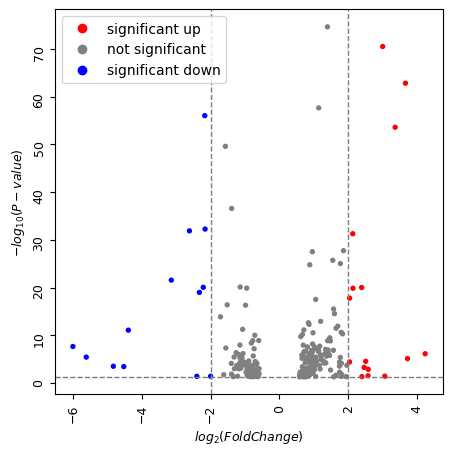

<Figure size 640x480 with 0 Axes>

In [294]:
# version without any labels
fig = visuz.GeneExpression.volcano(df=df_XAUT1_Blood_coarse_HC_UCNB, lfc='log2fc', pv='pval', 
                             lfc_thr=(2,2),pv_thr=(0.05,0.05), color=('red','grey','blue'),
                             #geneid='gene_cell_type_pair', genenames=tuple(list_sig_DEGs), 
                             plotlegend=True, gstyle=1, sign_line=True, show=True,figtype='pdf')
plt.show(fig)
figpath = '/mnt/ibm_lg/yangjoon.kim/UC_UCSF_Multiome/Manuscript/Figures/XAUT1/MAST/'
plt.savefig(figpath + 'volcano_XAUT1_Blood_HC_UCNB_log2fc_2_pval_005_nolabel.pdf')

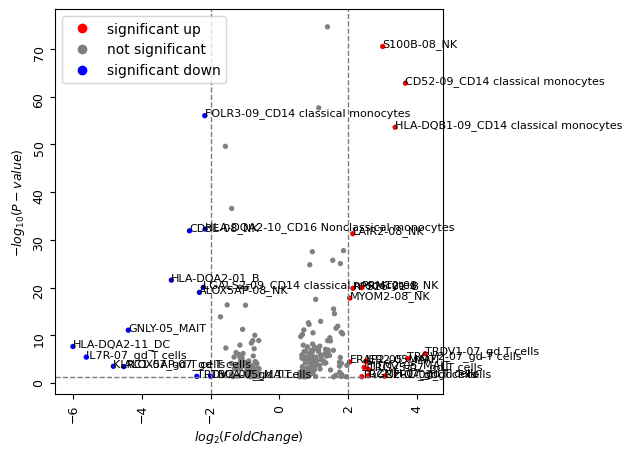

In [286]:
# version with gene-cell_type pairs
visuz.GeneExpression.volcano(df=df_XAUT1_Blood_coarse_HC_UCNB, lfc='log2fc', pv='pval', 
                             lfc_thr=(2,2),pv_thr=(0.05,0.05), color=('red','grey','blue'),
                             geneid='gene_cell_type_pair', genenames=tuple(list_sig_DEGs), 
                             plotlegend=True, gstyle=1, sign_line=True, show=True)

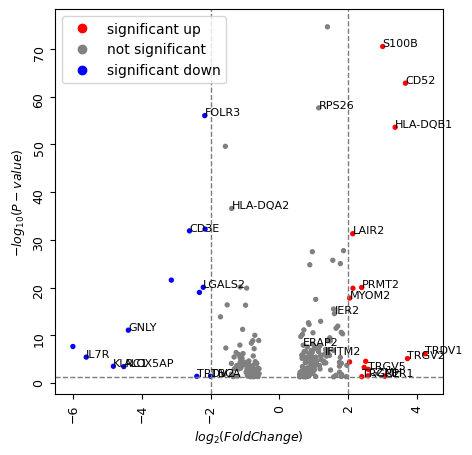

In [289]:
# version with only gene names
visuz.GeneExpression.volcano(df=df_XAUT1_Blood_coarse_HC_UCNB, lfc='log2fc', pv='pval', 
                             lfc_thr=(2,2),pv_thr=(0.05,0.05), color=('red','grey','blue'),
                             geneid='gene', genenames=tuple(list_sig_DEGs_gene), 
                             plotlegend=True, gstyle=1, sign_line=True, show=True)

In [47]:
df_XAUT1_Blood_coarse_HC_UCNB[df_XAUT1_Blood_coarse_HC_UCNB["log2fc"]>2]

,gene,pval,log2fc,cell_type,tissue,method,covariate,-log10_pval
1,GZMH,2.895342e-02,2.575342,07_gd T cells,XAUT1_Blood_HC_UCNB,MAST,ngenes,1.538300
5,RER1,3.531527e-02,3.061812,07_gd T cells,XAUT1_Blood_HC_UCNB,MAST,ngenes,1.452037
6,TRDV1,7.030514e-07,4.235243,07_gd T cells,XAUT1_Blood_HC_UCNB,MAST,ngenes,6.153013
8,TRGC2,4.510642e-02,2.394788,07_gd T cells,XAUT1_Blood_HC_UCNB,MAST,ngenes,1.345762
9,TRGV2,7.221305e-06,3.720878,07_gd T cells,XAUT1_Blood_HC_UCNB,MAST,ngenes,5.141384
10,TRGV5,1.303334e-03,2.581068,07_gd T cells,XAUT1_Blood_HC_UCNB,MAST,ngenes,2.884944
47,CD52,1.427616e-63,3.661910,09_CD14 classical monocytes,XAUT1_Blood_HC_UCNB,MAST,ngenes,62.845388
62,HLA-DQB1,2.443859e-54,3.362112,09_CD14 classical monocytes,XAUT1_Blood_HC_UCNB,MAST,ngenes,53.611924
144,LAIR2,5.021926e-32,2.130082,08_NK,XAUT1_Blood_HC_UCNB,MAST,ngenes,31.299130
149,MYOM2,1.510311e-18,2.039418,08_NK,XAUT1_Blood_HC_UCNB,MAST,ngenes,17.820934


In [46]:
df_XAUT1_Blood_coarse_HC_UCNB[df_XAUT1_Blood_coarse_HC_UCNB["log2fc"]<-3]

,gene,pval,log2fc,cell_type,tissue,method,covariate,-log10_pval
0,ALOX5AP,3.476082e-04,-4.526211,07_gd T cells,XAUT1_Blood_HC_UCNB,MAST,ngenes,3.458910
3,IL7R,3.549960e-06,-5.616784,07_gd T cells,XAUT1_Blood_HC_UCNB,MAST,ngenes,5.449776
4,KLRC1,2.956925e-04,-4.828989,07_gd T cells,XAUT1_Blood_HC_UCNB,MAST,ngenes,3.529160
178,HLA-DQA2,2.644826e-22,-3.144289,01_B,XAUT1_Blood_HC_UCNB,MAST,ngenes,21.577603
187,GNLY,8.117359e-12,-4.393883,05_MAIT,XAUT1_Blood_HC_UCNB,MAST,ngenes,11.090585
282,HLA-DQA2,2.148908e-08,-6.005274,11_DC,XAUT1_Blood_HC_UCNB,MAST,ngenes,7.667782


### (2) UCNB vs UCV


In [299]:
df_XAUT1_Blood_coarse_UCV_UCNB

,gene,gene_cell_type_pair,gene_cell_type_pair,pval,log2fc,cell_type,tissue,method,covariate
725,AC006369.2,AC006369.2-06_CD8 T,AC006369.2-06_CD8 T,1.660271e-07,-0.861714,06_CD8 T,XAUT1_Blood_UCV_UCNB,MAST,ngenes
726,ACTG1,ACTG1-06_CD8 T,ACTG1-06_CD8 T,6.074517e-11,0.904841,06_CD8 T,XAUT1_Blood_UCV_UCNB,MAST,ngenes
727,ACTR3,ACTR3-06_CD8 T,ACTR3-06_CD8 T,3.779647e-02,0.639015,06_CD8 T,XAUT1_Blood_UCV_UCNB,MAST,ngenes
728,ADAM8,ADAM8-06_CD8 T,ADAM8-06_CD8 T,1.268127e-03,0.632770,06_CD8 T,XAUT1_Blood_UCV_UCNB,MAST,ngenes
729,ADGRG1,ADGRG1-06_CD8 T,ADGRG1-06_CD8 T,1.020145e-05,1.093138,06_CD8 T,XAUT1_Blood_UCV_UCNB,MAST,ngenes
...,...,...,...,...,...,...,...,...,...
1120,CTSW,CTSW-05_MAIT,CTSW-05_MAIT,1.305445e-02,-2.841090,05_MAIT,XAUT1_Blood_UCV_UCNB,MAST,ngenes
1121,IFITM3,IFITM3-05_MAIT,IFITM3-05_MAIT,5.583396e-06,3.526953,05_MAIT,XAUT1_Blood_UCV_UCNB,MAST,ngenes
1122,MTND1P23,MTND1P23-05_MAIT,MTND1P23-05_MAIT,2.638960e-05,2.040210,05_MAIT,XAUT1_Blood_UCV_UCNB,MAST,ngenes
1123,RPS2P5,RPS2P5-05_MAIT,RPS2P5-05_MAIT,1.305445e-02,2.924478,05_MAIT,XAUT1_Blood_UCV_UCNB,MAST,ngenes


In [304]:
df_XAUT1_Blood_coarse_UCV_UCNB = df_XAUT1_Blood_coarse_UCV_UCNB.iloc[:,[0,1,3,4,5,6,7,8]]
df_XAUT1_Blood_coarse_UCV_UCNB

,gene,gene_cell_type_pair,pval,log2fc,cell_type,tissue,method,covariate
725,AC006369.2,AC006369.2-06_CD8 T,1.660271e-07,-0.861714,06_CD8 T,XAUT1_Blood_UCV_UCNB,MAST,ngenes
726,ACTG1,ACTG1-06_CD8 T,6.074517e-11,0.904841,06_CD8 T,XAUT1_Blood_UCV_UCNB,MAST,ngenes
727,ACTR3,ACTR3-06_CD8 T,3.779647e-02,0.639015,06_CD8 T,XAUT1_Blood_UCV_UCNB,MAST,ngenes
728,ADAM8,ADAM8-06_CD8 T,1.268127e-03,0.632770,06_CD8 T,XAUT1_Blood_UCV_UCNB,MAST,ngenes
729,ADGRG1,ADGRG1-06_CD8 T,1.020145e-05,1.093138,06_CD8 T,XAUT1_Blood_UCV_UCNB,MAST,ngenes
...,...,...,...,...,...,...,...,...
1120,CTSW,CTSW-05_MAIT,1.305445e-02,-2.841090,05_MAIT,XAUT1_Blood_UCV_UCNB,MAST,ngenes
1121,IFITM3,IFITM3-05_MAIT,5.583396e-06,3.526953,05_MAIT,XAUT1_Blood_UCV_UCNB,MAST,ngenes
1122,MTND1P23,MTND1P23-05_MAIT,2.638960e-05,2.040210,05_MAIT,XAUT1_Blood_UCV_UCNB,MAST,ngenes
1123,RPS2P5,RPS2P5-05_MAIT,1.305445e-02,2.924478,05_MAIT,XAUT1_Blood_UCV_UCNB,MAST,ngenes


In [305]:
# filter the dataframe of DEG
list_sig_DEGs = df_XAUT1_Blood_coarse_UCV_UCNB[(abs(df_XAUT1_Blood_coarse_UCV_UCNB["log2fc"])>2) & (df_XAUT1_Blood_coarse_UCV_UCNB["pval"]<0.05)]["gene_cell_type_pair"]
list_sig_DEGs = list_sig_DEGs.to_list()
list_sig_DEGs

['DUSP2-06_CD8 T',
 'FGFBP2-06_CD8 T',
 'FOS-06_CD8 T',
 'GNLY-06_CD8 T',
 'GZMB-06_CD8 T',
 'GZMK-06_CD8 T',
 'ITGB1-06_CD8 T',
 'MT2A-06_CD8 T',
 'RPS4Y1-06_CD8 T',
 'ZNF683-06_CD8 T',
 'CD52-09_CD14 classical monocytes',
 'HLA-DQB1-09_CD14 classical monocytes',
 'RPS4Y1-09_CD14 classical monocytes',
 'TMEM176A-09_CD14 classical monocytes',
 'TMEM176B-09_CD14 classical monocytes',
 'RPS4Y1-10_CD16 Nonclassical monocytes',
 'TIMP1-10_CD16 Nonclassical monocytes',
 'TMEM176B-10_CD16 Nonclassical monocytes',
 'IFITM3-07_gd T cells',
 'KLRC1-07_gd T cells',
 'TRBC2-07_gd T cells',
 'TRDV1-07_gd T cells',
 'TRDV2-07_gd T cells',
 'MYOM2-08_NK',
 'PTGDS-08_NK',
 'RPS4Y1-08_NK',
 'RPS4Y1-03_CD4 T',
 'RPS26-14_Erythrocytes',
 'RPS4Y1-14_Erythrocytes',
 'RPS4Y1-01_B',
 'CTSW-05_MAIT',
 'IFITM3-05_MAIT',
 'MTND1P23-05_MAIT',
 'RPS2P5-05_MAIT']

In [306]:
# filter the dataframe of DEG
list_sig_DEGs_gene = df_XAUT1_Blood_coarse_UCV_UCNB[(abs(df_XAUT1_Blood_coarse_UCV_UCNB["log2fc"])>2) & (df_XAUT1_Blood_coarse_UCV_UCNB["pval"]<0.05)]["gene"]
list_sig_DEGs_gene = list_sig_DEGs_gene.to_list()
list_sig_DEGs_gene

['DUSP2',
 'FGFBP2',
 'FOS',
 'GNLY',
 'GZMB',
 'GZMK',
 'ITGB1',
 'MT2A',
 'RPS4Y1',
 'ZNF683',
 'CD52',
 'HLA-DQB1',
 'RPS4Y1',
 'TMEM176A',
 'TMEM176B',
 'RPS4Y1',
 'TIMP1',
 'TMEM176B',
 'IFITM3',
 'KLRC1',
 'TRBC2',
 'TRDV1',
 'TRDV2',
 'MYOM2',
 'PTGDS',
 'RPS4Y1',
 'RPS4Y1',
 'RPS26',
 'RPS4Y1',
 'RPS4Y1',
 'CTSW',
 'IFITM3',
 'MTND1P23',
 'RPS2P5']

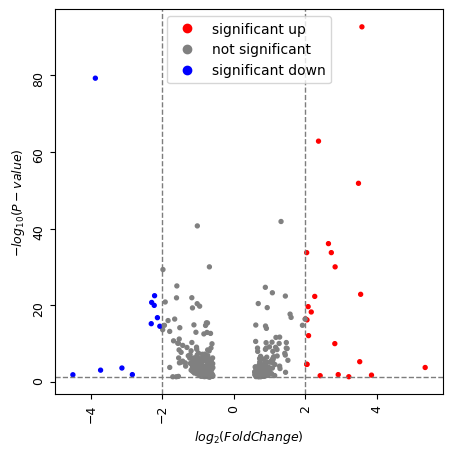

In [307]:
# version without any labels
visuz.GeneExpression.volcano(df=df_XAUT1_Blood_coarse_UCV_UCNB, lfc='log2fc', pv='pval', 
                             lfc_thr=(2,2),pv_thr=(0.05,0.05), color=('red','grey','blue'),
                             #geneid='gene_cell_type_pair', genenames=tuple(list_sig_DEGs), 
                             plotlegend=True, gstyle=1, sign_line=True, show=True)

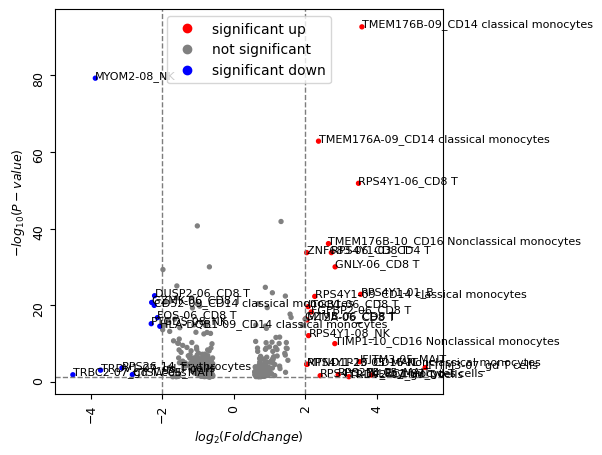

In [308]:
# version with gene-cell_type pairs
visuz.GeneExpression.volcano(df=df_XAUT1_Blood_coarse_UCV_UCNB, lfc='log2fc', pv='pval', 
                             lfc_thr=(2,2),pv_thr=(0.05,0.05), color=('red','grey','blue'),
                             geneid='gene_cell_type_pair', genenames=tuple(list_sig_DEGs), 
                             plotlegend=True, gstyle=1, sign_line=True, show=True)

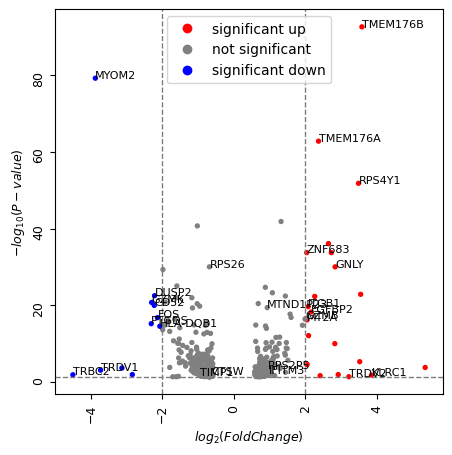

In [309]:
# version with only gene names
visuz.GeneExpression.volcano(df=df_XAUT1_Blood_coarse_UCV_UCNB, lfc='log2fc', pv='pval', 
                             lfc_thr=(2,2),pv_thr=(0.05,0.05), color=('red','grey','blue'),
                             geneid='gene', genenames=tuple(list_sig_DEGs_gene), 
                             plotlegend=True, gstyle=1, sign_line=True, show=True)

### (3) HC vs UCV

In [312]:
# filter the dataframe of DEG
list_sig_DEGs = df_XAUT1_Blood_coarse_HC_UCV[(abs(df_XAUT1_Blood_coarse_HC_UCV["log2fc"])>2) & (df_XAUT1_Blood_coarse_HC_UCV["pval"]<0.05)]["gene_cell_type_pair"]
list_sig_DEGs = list_sig_DEGs.to_list()
list_sig_DEGs

['FOS-07_gd T cells',
 'IFITM3-07_gd T cells',
 'SMDT1-07_gd T cells',
 'IFITM3-03_CD4 T',
 'RPS4Y1-03_CD4 T',
 'DUSP2-06_CD8 T',
 'FGFBP2-06_CD8 T',
 'GNLY-06_CD8 T',
 'GZMB-06_CD8 T',
 'GZMH-06_CD8 T',
 'GZMK-06_CD8 T',
 'IL7R-06_CD8 T',
 'RP11-291B21.2-06_CD8 T',
 'RPS4Y1-06_CD8 T',
 'ZNF683-06_CD8 T',
 'FOLR3-09_CD14 classical monocytes',
 'IFITM3-09_CD14 classical monocytes',
 'TMEM176A-09_CD14 classical monocytes',
 'TMEM176B-09_CD14 classical monocytes',
 'CLEC12A-10_CD16 Nonclassical monocytes',
 'HLA-DQA2-10_CD16 Nonclassical monocytes',
 'TMEM176B-10_CD16 Nonclassical monocytes',
 'HLA-DQA2-01_B',
 'RPS4Y1-01_B',
 'CCL5-05_MAIT',
 'CTSW-05_MAIT',
 'GNLY-05_MAIT',
 'IFITM3-05_MAIT',
 'JUN-05_MAIT',
 'KLRG1-05_MAIT',
 'MTND1P23-05_MAIT',
 'RPS2P5-05_MAIT',
 'RPS4Y1-05_MAIT',
 'SMDT1-05_MAIT',
 'ALOX5AP-08_NK',
 'RPS4Y1-08_NK',
 'HLA-DQA2-11_DC',
 'CDKN1A-13_Platelets',
 'RPL14-13_Platelets',
 'RPL3-13_Platelets',
 'RPL34-13_Platelets',
 'RUFY1-13_Platelets']

In [313]:
# filter the dataframe of DEG
list_sig_DEGs_gene = df_XAUT1_Blood_coarse_HC_UCV[(abs(df_XAUT1_Blood_coarse_HC_UCV["log2fc"])>2) & (df_XAUT1_Blood_coarse_HC_UCV["pval"]<0.05)]["gene"]
list_sig_DEGs_gene = list_sig_DEGs_gene.to_list()
list_sig_DEGs_gene

['FOS',
 'IFITM3',
 'SMDT1',
 'IFITM3',
 'RPS4Y1',
 'DUSP2',
 'FGFBP2',
 'GNLY',
 'GZMB',
 'GZMH',
 'GZMK',
 'IL7R',
 'RP11-291B21.2',
 'RPS4Y1',
 'ZNF683',
 'FOLR3',
 'IFITM3',
 'TMEM176A',
 'TMEM176B',
 'CLEC12A',
 'HLA-DQA2',
 'TMEM176B',
 'HLA-DQA2',
 'RPS4Y1',
 'CCL5',
 'CTSW',
 'GNLY',
 'IFITM3',
 'JUN',
 'KLRG1',
 'MTND1P23',
 'RPS2P5',
 'RPS4Y1',
 'SMDT1',
 'ALOX5AP',
 'RPS4Y1',
 'HLA-DQA2',
 'CDKN1A',
 'RPL14',
 'RPL3',
 'RPL34',
 'RUFY1']

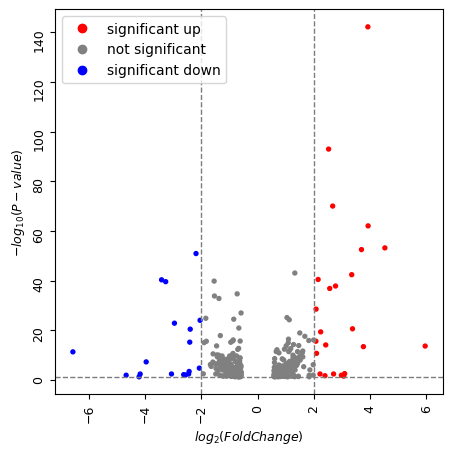

In [314]:
# version without any labels
visuz.GeneExpression.volcano(df=df_XAUT1_Blood_coarse_HC_UCV, lfc='log2fc', pv='pval', 
                             lfc_thr=(2,2),pv_thr=(0.05,0.05), color=('red','grey','blue'),
                             #geneid='gene_cell_type_pair', genenames=tuple(list_sig_DEGs), 
                             plotlegend=True, gstyle=1, sign_line=True, show=True)

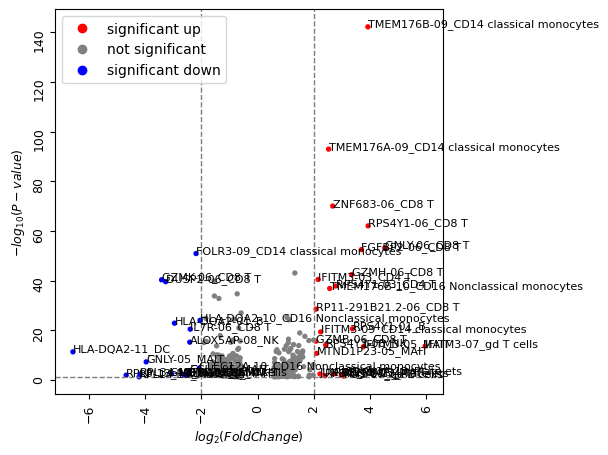

In [315]:
# version with gene-cell_type pairs
visuz.GeneExpression.volcano(df=df_XAUT1_Blood_coarse_HC_UCV, lfc='log2fc', pv='pval', 
                             lfc_thr=(2,2),pv_thr=(0.05,0.05), color=('red','grey','blue'),
                             geneid='gene_cell_type_pair', genenames=tuple(list_sig_DEGs), 
                             plotlegend=True, gstyle=1, sign_line=True, show=True)

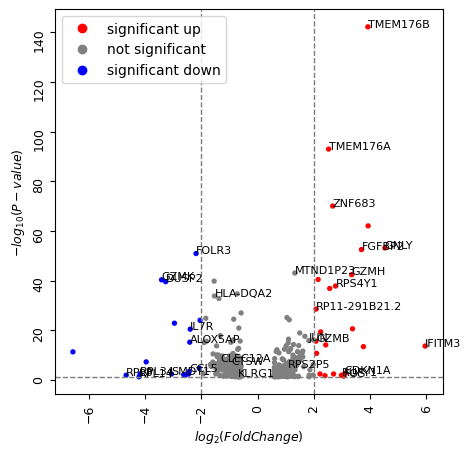

In [316]:
# version with only gene names
visuz.GeneExpression.volcano(df=df_XAUT1_Blood_coarse_HC_UCV, lfc='log2fc', pv='pval', 
                             lfc_thr=(2,2),pv_thr=(0.05,0.05), color=('red','grey','blue'),
                             geneid='gene', genenames=tuple(list_sig_DEGs_gene), 
                             plotlegend=True, gstyle=1, sign_line=True, show=True)

## 2D visuliazation of the DGE results (Healthy-Disease vs Disease-Treatment)

## Subset for cell-types to check the DGE

Text(0.5, 1.0, '08_NK')

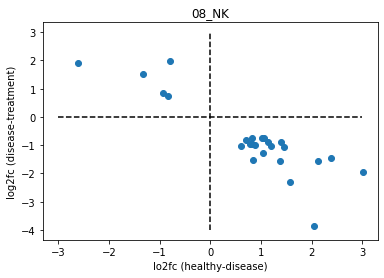

In [126]:
cell_type = '08_NK'

df_subset_HC_UCNB = df_XAUT1_Blood_coarse_HC_UCNB[df_XAUT1_Blood_coarse_HC_UCNB["cell_type"]==cell_type]
df_subset_UCNB_UCV = df_XAUT1_Blood_coarse_UCV_UCNB[df_XAUT1_Blood_coarse_UCV_UCNB["cell_type"]==cell_type]

list_genes_HC_UCNB = df_subset_HC_UCNB["gene"].to_list()
list_genes_UCNB_UCV = df_subset_UCNB_UCV["gene"].to_list()
list_genes_UCNB_UCV

joint_gene_set = list(set(list_genes_HC_UCNB) & set(list_genes_UCNB_UCV))
joint_gene_set
#gene_set_joint = set(list_genes_HC_UCNB).intersection(set(list_genes_UCNB_UCV))

df_subset_HC_UCNB_joint_genes = df_subset_HC_UCNB[df_subset_HC_UCNB["gene"].isin(joint_gene_set)]
df_subset_UCNB_UCV_joint_genes = df_subset_UCNB_UCV[df_subset_UCNB_UCV["gene"].isin(joint_gene_set)]

plt.scatter(df_subset_HC_UCNB_joint_genes["log2fc"], df_subset_UCNB_UCV_joint_genes['log2fc'])
plt.plot([-3,3], [0,0], '--k')
plt.plot([0,0],[-4,3], '--k')
plt.xlabel('lo2fc (healthy-disease)') # HC vs UCNB
plt.ylabel('log2fc (disease-treatment)') # UCNB vs UCV
plt.title(cell_type)

In [117]:
df_subset_HC_UCNB_joint_genes.sort_values('log2fc')

,gene,pval,log2fc,cell_type,tissue,method,covariate
114,CD3E,1.259576e-32,-2.616722,08_NK,XAUT1_Blood_HC_UCNB,MAST,ngenes
165,SH2D2A,3.451253e-06,-1.320364,08_NK,XAUT1_Blood_HC_UCNB,MAST,ngenes
170,TSC22D3,2.250873e-02,-0.935093,08_NK,XAUT1_Blood_HC_UCNB,MAST,ngenes
133,HSPA8,4.631997e-02,-0.841349,08_NK,XAUT1_Blood_HC_UCNB,MAST,ngenes
132,HLA-DPB1,2.742123e-03,-0.792991,08_NK,XAUT1_Blood_HC_UCNB,MAST,ngenes
168,TMIGD2,3.052151e-02,0.612220,08_NK,XAUT1_Blood_HC_UCNB,MAST,ngenes
106,ACTN4,1.594494e-02,0.706688,08_NK,XAUT1_Blood_HC_UCNB,MAST,ngenes
116,CDC42,2.924479e-02,0.782013,08_NK,XAUT1_Blood_HC_UCNB,MAST,ngenes
158,RP11-108M9.4,1.044665e-05,0.814202,08_NK,XAUT1_Blood_HC_UCNB,MAST,ngenes
142,KLRG1,1.054032e-03,0.820593,08_NK,XAUT1_Blood_HC_UCNB,MAST,ngenes


In [105]:
df_subset_HC_UCNB["gene"].isin(joint_gene_set)
df_subset_HC_UCNB[df_subset_HC_UCNB["gene"].isin(joint_gene_set)]

,gene,pval,log2fc,cell_type,tissue,method,covariate
106,ACTN4,1.594494e-02,0.706688,08_NK,XAUT1_Blood_HC_UCNB,MAST,ngenes
114,CD3E,1.259576e-32,-2.616722,08_NK,XAUT1_Blood_HC_UCNB,MAST,ngenes
116,CDC42,2.924479e-02,0.782013,08_NK,XAUT1_Blood_HC_UCNB,MAST,ngenes
119,CHI3L2,2.915184e-18,1.052988,08_NK,XAUT1_Blood_HC_UCNB,MAST,ngenes
122,DIP2A,1.279293e-09,1.398999,08_NK,XAUT1_Blood_HC_UCNB,MAST,ngenes
130,GADD45B,2.216825e-06,1.367662,08_NK,XAUT1_Blood_HC_UCNB,MAST,ngenes
132,HLA-DPB1,2.742123e-03,-0.792991,08_NK,XAUT1_Blood_HC_UCNB,MAST,ngenes
133,HSPA8,4.631997e-02,-0.841349,08_NK,XAUT1_Blood_HC_UCNB,MAST,ngenes
134,IER2,3.182663e-10,1.462344,08_NK,XAUT1_Blood_HC_UCNB,MAST,ngenes
139,KIR2DL1,1.126737e-13,1.196767,08_NK,XAUT1_Blood_HC_UCNB,MAST,ngenes


In [154]:
df_DGE_genes_filtered = pd.DataFrame()

In [318]:
df_XAUT1_Blood_coarse_HC_UCNB

,gene,gene_cell_type_pair,pval,log2fc,cell_type,tissue,method,covariate
0,ALOX5AP,ALOX5AP-07_gd T cells,3.476082e-04,-4.526211,07_gd T cells,XAUT1_Blood_HC_UCNB,MAST,ngenes
1,GZMH,GZMH-07_gd T cells,2.895342e-02,2.575342,07_gd T cells,XAUT1_Blood_HC_UCNB,MAST,ngenes
2,HLA-B,HLA-B-07_gd T cells,1.789621e-03,-0.927382,07_gd T cells,XAUT1_Blood_HC_UCNB,MAST,ngenes
3,IL7R,IL7R-07_gd T cells,3.549960e-06,-5.616784,07_gd T cells,XAUT1_Blood_HC_UCNB,MAST,ngenes
4,KLRC1,KLRC1-07_gd T cells,2.956925e-04,-4.828989,07_gd T cells,XAUT1_Blood_HC_UCNB,MAST,ngenes
...,...,...,...,...,...,...,...,...
278,TSC22D3,TSC22D3-06_CD8 T,1.620073e-02,-0.877302,06_CD8 T,XAUT1_Blood_HC_UCNB,MAST,ngenes
279,TXNIP,TXNIP-06_CD8 T,6.250345e-08,-0.736698,06_CD8 T,XAUT1_Blood_HC_UCNB,MAST,ngenes
280,XCL1,XCL1-06_CD8 T,9.566442e-11,-0.716326,06_CD8 T,XAUT1_Blood_HC_UCNB,MAST,ngenes
281,ZNF683,ZNF683-06_CD8 T,1.758964e-10,0.619338,06_CD8 T,XAUT1_Blood_HC_UCNB,MAST,ngenes


In [319]:
df_DGE_genes_filtered

,gene,cell_type,log2fc_HC_UCNB,log2fc_UCNB_UCV,log2fc_HC_UCV,pval_HC_UCNB,pval_UCNB_UCV,pval_HC_UCV
0,MT-ATP8,06_CD8 T,1.171876,-1.920227,0.000000,1.796887e-08,1.474503e-21,NaN
1,TRGV9,06_CD8 T,0.756433,-1.060308,0.000000,9.161722e-06,1.167428e-13,NaN
4,GADD45B,06_CD8 T,0.931738,-1.794489,-0.782129,4.101404e-03,6.988576e-14,2.158968e-02
5,IER2,06_CD8 T,1.338640,-1.069399,0.757337,8.523705e-08,1.259225e-05,4.686024e-04
6,TRBV5-6,06_CD8 T,0.716029,-1.025455,0.000000,2.568732e-07,4.121046e-21,NaN
...,...,...,...,...,...,...,...,...
83,RPS26,03_CD4 T,1.141890,-1.020950,0.687900,2.146648e-58,2.082647e-41,6.126361e-13
84,SNHG8,03_CD4 T,1.037524,-1.474943,-0.686194,2.257322e-04,2.035611e-08,3.893026e-02
85,TUFM,03_CD4 T,0.672207,-0.968520,0.000000,2.549997e-02,7.480460e-05,NaN
86,GM2A,01_B,0.709436,-0.763511,0.000000,2.035737e-02,6.639683e-03,NaN


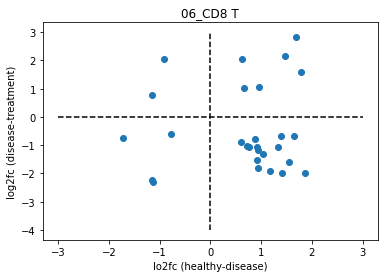

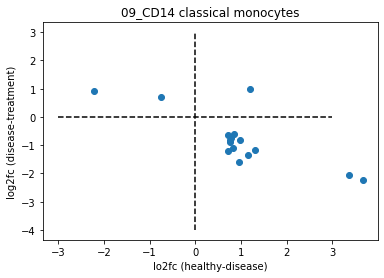

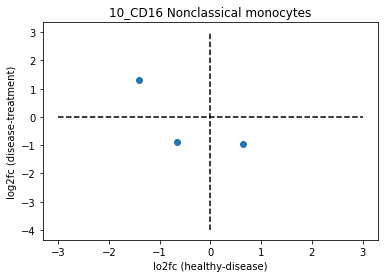

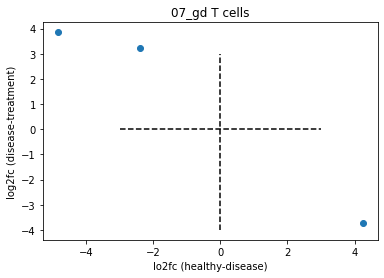

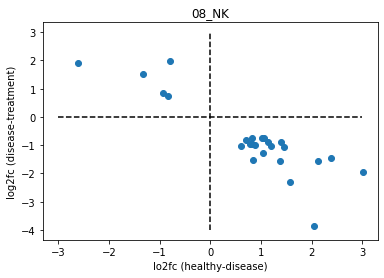

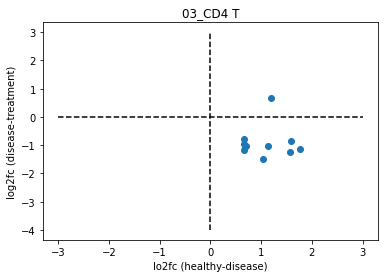

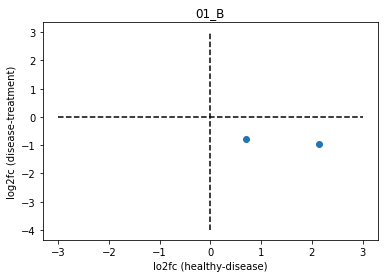

In [213]:
# define the list of cell-types
list_cell_types = df_XAUT1_Blood_coarse_UCV_UCNB["cell_type"].unique()
num_cell_types = len(list_cell_types)

# initialize the dataframe to save the resulting genes with their p-values, log2fc, cell-type, etc.
df_DGE_genes_filtered = pd.DataFrame()
# joint_gene_set_master = []
index = 0 # index for the df_DGE_genes_filtered

for cell_type in list_cell_types:
    df_subset_HC_UCNB = df_XAUT1_Blood_coarse_HC_UCNB[df_XAUT1_Blood_coarse_HC_UCNB["cell_type"]==cell_type]
    df_subset_UCNB_UCV = df_XAUT1_Blood_coarse_UCV_UCNB[df_XAUT1_Blood_coarse_UCV_UCNB["cell_type"]==cell_type]

#     # filter out for abs(log2fc) > 2
#     df_subset_HC_UCNB = df_subset_HC_UCNB[abs(df_subset_HC_UCNB["log2fc"])>2]
#     df_subset_UCNB_UCV = df_subset_UCNB_UCV[abs(df_subset_UCNB_UCV["log2fc"])>2]

    list_genes_HC_UCNB = df_subset_HC_UCNB["gene"].to_list()
    list_genes_UCNB_UCV = df_subset_UCNB_UCV["gene"].to_list()
    list_genes_UCNB_UCV

    joint_gene_set = list(set(list_genes_HC_UCNB) & set(list_genes_UCNB_UCV))
    joint_gene_set
#     # Append the joint_gene_set to the master list
#     joint_gene_set_master.append(joint_gene_set)
    #gene_set_joint = set(list_genes_HC_UCNB).intersection(set(list_genes_UCNB_UCV))

    df_subset_HC_UCNB_joint_genes = df_subset_HC_UCNB[df_subset_HC_UCNB["gene"].isin(joint_gene_set)]
    df_subset_UCNB_UCV_joint_genes = df_subset_UCNB_UCV[df_subset_UCNB_UCV["gene"].isin(joint_gene_set)]

    if len(joint_gene_set)>0:
        plt.figure()
        plt.scatter(df_subset_HC_UCNB_joint_genes["log2fc"], df_subset_UCNB_UCV_joint_genes['log2fc'])
        plt.plot([-3,3], [0,0], '--k')
        plt.plot([0,0],[-4,3], '--k')
        plt.xlabel('lo2fc (healthy-disease)') # HC vs UCNB
        plt.ylabel('log2fc (disease-treatment)') # UCNB vs UCV
        plt.title(cell_type)
    
    
    for k in range(0,len(joint_gene_set)):
        gene = joint_gene_set[k]
        log2fc_value1 = df_subset_HC_UCNB_joint_genes[df_subset_HC_UCNB_joint_genes["gene"]==gene]["log2fc"].iloc[0]
        log2fc_value2 = df_subset_UCNB_UCV_joint_genes[df_subset_UCNB_UCV_joint_genes["gene"]==gene]["log2fc"].iloc[0]
        if (log2fc_value1*log2fc_value2)<0:
            df_DGE_genes_filtered.loc[index,"gene"] = gene
            df_DGE_genes_filtered.loc[index,"cell_type"] = cell_type#df_subset_HC_UCNB[df_subset_HC_UCNB["gene"]==gene]["cell_type"].iloc[0]
            df_DGE_genes_filtered.loc[index,"pval_HC_UCNB"] = df_subset_HC_UCNB[df_subset_HC_UCNB["gene"]==gene]["pval"].iloc[0]
            df_DGE_genes_filtered.loc[index,"pval_UCNB_UCV"] = df_subset_UCNB_UCV[df_subset_UCNB_UCV["gene"]==gene]["pval"].iloc[0]
            df_DGE_genes_filtered.loc[index,"log2fc_HC_UCNB"]= df_subset_HC_UCNB[df_subset_HC_UCNB["gene"]==gene]["log2fc"].iloc[0]
            df_DGE_genes_filtered.loc[index,"log2fc_UCNB_UCV"]= df_subset_UCNB_UCV[df_subset_UCNB_UCV["gene"]==gene]["log2fc"].iloc[0]
            
            if gene in df_XAUT1_Blood_coarse_HC_UCV["gene"].to_list():
                df_DGE_genes_filtered.loc[index,"log2fc_HC_UCV"] = df_XAUT1_Blood_coarse_HC_UCV[df_XAUT1_Blood_coarse_HC_UCV["gene"]==gene]["log2fc"].iloc[0]
                df_DGE_genes_filtered.loc[index,"pval_HC_UCV"] = df_XAUT1_Blood_coarse_HC_UCV[df_XAUT1_Blood_coarse_HC_UCV["gene"]==gene]["pval"].iloc[0]
            else:
                df_DGE_genes_filtered.loc[index,"log2fc_HC_UCV"] = 0
                df_DGE_genes_filtered.loc[index,"pval_HC_UCV"] = math.nan
        else:
            df_DGE_genes_filtered = df_DGE_genes_filtered
                
                
        index = index+1
        



    

In [205]:
import math
math.nan

nan

In [217]:
df_DGE_genes_filtered[df_DGE_genes_filtered["cell_type"]=="07_gd T cells"]

,gene,cell_type,pval_HC_UCNB,pval_UCNB_UCV,log2fc_HC_UCNB,log2fc_UCNB_UCV,log2fc_HC_UCV,pval_HC_UCV
47,KLRC1,07_gd T cells,2.956925e-04,0.017760,-4.828989,3.856565,0.0,NaN
48,TRDV2,07_gd T cells,3.842811e-02,0.046548,-2.402791,3.221263,0.0,NaN
49,TRDV1,07_gd T cells,7.030514e-07,0.000898,4.235243,-3.730518,0.0,NaN


In [222]:
# reorder the columns in the dataframe
df_DGE_genes_filtered = df_DGE_genes_filtered[["gene","cell_type","log2fc_HC_UCNB","log2fc_UCNB_UCV","log2fc_HC_UCV","pval_HC_UCNB","pval_UCNB_UCV","pval_HC_UCV"]]
df_DGE_genes_filtered

,gene,cell_type,log2fc_HC_UCNB,log2fc_UCNB_UCV,log2fc_HC_UCV,pval_HC_UCNB,pval_UCNB_UCV,pval_HC_UCV
0,MT-ATP8,06_CD8 T,1.171876,-1.920227,0.000000,1.796887e-08,1.474503e-21,NaN
1,TRGV9,06_CD8 T,0.756433,-1.060308,0.000000,9.161722e-06,1.167428e-13,NaN
4,GADD45B,06_CD8 T,0.931738,-1.794489,-0.782129,4.101404e-03,6.988576e-14,2.158968e-02
5,IER2,06_CD8 T,1.338640,-1.069399,0.757337,8.523705e-08,1.259225e-05,4.686024e-04
6,TRBV5-6,06_CD8 T,0.716029,-1.025455,0.000000,2.568732e-07,4.121046e-21,NaN
...,...,...,...,...,...,...,...,...
83,RPS26,03_CD4 T,1.141890,-1.020950,0.687900,2.146648e-58,2.082647e-41,6.126361e-13
84,SNHG8,03_CD4 T,1.037524,-1.474943,-0.686194,2.257322e-04,2.035611e-08,3.893026e-02
85,TUFM,03_CD4 T,0.672207,-0.968520,0.000000,2.549997e-02,7.480460e-05,NaN
86,GM2A,01_B,0.709436,-0.763511,0.000000,2.035737e-02,6.639683e-03,NaN


In [223]:
df_DGE_genes_filtered.to_csv('/mnt/ibm_lg/yangjoon.kim/UC_UCSF_Multiome/MAST/result/XAUT1_Blood_coarse_filtered_by_combos.csv')

In [296]:
df_DGE_genes_filtered.sort_values('log2fc_HC_UCNB')

,gene,cell_type,log2fc_HC_UCNB,log2fc_UCNB_UCV,log2fc_HC_UCV,pval_HC_UCNB,pval_UCNB_UCV,pval_HC_UCV
47,KLRC1,07_gd T cells,-4.828989,3.856565,0.000000,2.956925e-04,1.775979e-02,NaN
66,CD3E,08_NK,-2.616722,1.922623,0.000000,1.259576e-32,1.763721e-15,NaN
48,TRDV2,07_gd T cells,-2.402791,3.221263,0.000000,3.842811e-02,4.654787e-02,NaN
33,LGALS2,09_CD14 classical monocytes,-2.215732,0.930066,-1.250366,8.432000e-21,4.269017e-04,8.852128e-05
45,PLAC8,10_CD16 Nonclassical monocytes,-1.398167,1.294061,-1.264653,7.547693e-05,3.483352e-04,1.921799e-10
...,...,...,...,...,...,...,...,...
70,PRMT2,08_NK,2.388845,-1.470700,1.088753,9.302474e-21,7.460270e-06,2.422790e-05
62,S100B,08_NK,3.000896,-1.942505,1.087706,2.953249e-71,1.763721e-15,9.682966e-16
42,HLA-DQB1,09_CD14 classical monocytes,3.362112,-2.071132,1.260123,2.443859e-54,3.143880e-15,1.071795e-05
30,CD52,09_CD14 classical monocytes,3.661910,-2.228155,1.097058,1.427616e-63,1.131023e-20,3.274449e-17


In [140]:
df_XAUT1_Blood_coarse_HC_UCV[df_XAUT1_Blood_coarse_HC_UCV["gene"]==gene].empty

False

In [187]:
(df_subset_HC_UCNB_joint_genes[df_subset_HC_UCNB_joint_genes["gene"]==gene]["log2fc"].iloc[0]*df_subset_UCNB_UCV_joint_genes[df_subset_UCNB_UCV_joint_genes["gene"]==gene]["log2fc"].iloc[0])

-2.2502678277211348

In [332]:
df_XAUT1_Blood_coarse_HC_UCNB

,gene,gene_cell_type_pair,pval,log2fc,cell_type,tissue,method,covariate
0,ALOX5AP,ALOX5AP-07_gd T cells,3.476082e-04,-4.526211,07_gd T cells,XAUT1_Blood_HC_UCNB,MAST,ngenes
1,GZMH,GZMH-07_gd T cells,2.895342e-02,2.575342,07_gd T cells,XAUT1_Blood_HC_UCNB,MAST,ngenes
2,HLA-B,HLA-B-07_gd T cells,1.789621e-03,-0.927382,07_gd T cells,XAUT1_Blood_HC_UCNB,MAST,ngenes
3,IL7R,IL7R-07_gd T cells,3.549960e-06,-5.616784,07_gd T cells,XAUT1_Blood_HC_UCNB,MAST,ngenes
4,KLRC1,KLRC1-07_gd T cells,2.956925e-04,-4.828989,07_gd T cells,XAUT1_Blood_HC_UCNB,MAST,ngenes
...,...,...,...,...,...,...,...,...
278,TSC22D3,TSC22D3-06_CD8 T,1.620073e-02,-0.877302,06_CD8 T,XAUT1_Blood_HC_UCNB,MAST,ngenes
279,TXNIP,TXNIP-06_CD8 T,6.250345e-08,-0.736698,06_CD8 T,XAUT1_Blood_HC_UCNB,MAST,ngenes
280,XCL1,XCL1-06_CD8 T,9.566442e-11,-0.716326,06_CD8 T,XAUT1_Blood_HC_UCNB,MAST,ngenes
281,ZNF683,ZNF683-06_CD8 T,1.758964e-10,0.619338,06_CD8 T,XAUT1_Blood_HC_UCNB,MAST,ngenes


## 2D visualization for all DGE genes (without filtering)

Caveats: The genes are filtered by the following thresholds after the MAST run
- p-value<0.05
- abs(log2FC) > log2(1.5)

But, from here, we'd like to generate a 2D visualization without filtering genes further

- 1) What is the joint subset of genes bewteen HC-UCNB and UCNB-UCV?
    : HC-UCNB(283) and UCNB-UCV(400) -> joint subset is 75 genes (non-zero for both of the list)
- 2) How linearly correlated to "y=-x" the dataset is (with or without filtering for the joing subset)
    : 


In [324]:
df_DGE_genes_filtered

,gene,cell_type,pval_HC_UCNB,pval_UCNB_UCV,log2fc_HC_UCNB,log2fc_UCNB_UCV,log2fc_HC_UCV,pval_HC_UCV
0,MT-ATP8,06_CD8 T,1.796887e-08,1.474503e-21,1.171876,-1.920227,0.000000,NaN
1,TRGV9,06_CD8 T,9.161722e-06,1.167428e-13,0.756433,-1.060308,0.000000,NaN
4,GADD45B,06_CD8 T,4.101404e-03,6.988576e-14,0.931738,-1.794489,-0.782129,2.158968e-02
5,IER2,06_CD8 T,8.523705e-08,1.259225e-05,1.338640,-1.069399,0.757337,4.686024e-04
6,TRBV5-6,06_CD8 T,2.568732e-07,4.121046e-21,0.716029,-1.025455,0.000000,NaN
...,...,...,...,...,...,...,...,...
83,RPS26,03_CD4 T,2.146648e-58,2.082647e-41,1.141890,-1.020950,0.687900,6.126361e-13
84,SNHG8,03_CD4 T,2.257322e-04,2.035611e-08,1.037524,-1.474943,-0.686194,3.893026e-02
85,TUFM,03_CD4 T,2.549997e-02,7.480460e-05,0.672207,-0.968520,0.000000,NaN
86,GM2A,01_B,2.035737e-02,6.639683e-03,0.709436,-0.763511,0.000000,NaN


In [334]:
# define the list of cell-types
list_cell_types = df_XAUT1_Blood_coarse_UCV_UCNB["cell_type"].unique()
num_cell_types = len(list_cell_types)

# initialize the dataframe to save the resulting genes with their p-values, log2fc, cell-type, etc.
df_DGE_genes_filtered = pd.DataFrame()
df_DGE_genes_filtered_out = pd.DataFrame() # dataframe for genes that are filtered "OUT"

# joint_gene_set_master = []
index = 0 # index for the df_DGE_genes_filtered
index_out = 0 # index for the df_DGE_genes_filtered_out

for cell_type in list_cell_types:
    df_subset_HC_UCNB = df_XAUT1_Blood_coarse_HC_UCNB[df_XAUT1_Blood_coarse_HC_UCNB["cell_type"]==cell_type]
    df_subset_UCNB_UCV = df_XAUT1_Blood_coarse_UCV_UCNB[df_XAUT1_Blood_coarse_UCV_UCNB["cell_type"]==cell_type]

#     # filter out for abs(log2fc) > 2
#     df_subset_HC_UCNB = df_subset_HC_UCNB[abs(df_subset_HC_UCNB["log2fc"])>2]
#     df_subset_UCNB_UCV = df_subset_UCNB_UCV[abs(df_subset_UCNB_UCV["log2fc"])>2]

    list_genes_HC_UCNB = df_subset_HC_UCNB["gene"].to_list()
    list_genes_UCNB_UCV = df_subset_UCNB_UCV["gene"].to_list()
    list_genes_UCNB_UCV

    joint_gene_set = list(set(list_genes_HC_UCNB) & set(list_genes_UCNB_UCV))
    joint_gene_set
#     # Append the joint_gene_set to the master list
#     joint_gene_set_master.append(joint_gene_set)
    #gene_set_joint = set(list_genes_HC_UCNB).intersection(set(list_genes_UCNB_UCV))

    df_subset_HC_UCNB_joint_genes = df_subset_HC_UCNB[df_subset_HC_UCNB["gene"].isin(joint_gene_set)]
    df_subset_UCNB_UCV_joint_genes = df_subset_UCNB_UCV[df_subset_UCNB_UCV["gene"].isin(joint_gene_set)]


    for k in range(0,len(joint_gene_set)):
        gene = joint_gene_set[k]
        log2fc_value1 = df_subset_HC_UCNB_joint_genes[df_subset_HC_UCNB_joint_genes["gene"]==gene]["log2fc"].iloc[0]
        log2fc_value2 = df_subset_UCNB_UCV_joint_genes[df_subset_UCNB_UCV_joint_genes["gene"]==gene]["log2fc"].iloc[0]
        if (log2fc_value1*log2fc_value2)<0:
            df_DGE_genes_filtered.loc[index,"gene"] = gene
            df_DGE_genes_filtered.loc[index,"cell_type"] = cell_type#df_subset_HC_UCNB[df_subset_HC_UCNB["gene"]==gene]["cell_type"].iloc[0]
            df_DGE_genes_filtered.loc[index,"pval_HC_UCNB"] = df_subset_HC_UCNB[df_subset_HC_UCNB["gene"]==gene]["pval"].iloc[0]
            df_DGE_genes_filtered.loc[index,"pval_UCNB_UCV"] = df_subset_UCNB_UCV[df_subset_UCNB_UCV["gene"]==gene]["pval"].iloc[0]
            df_DGE_genes_filtered.loc[index,"log2fc_HC_UCNB"]= df_subset_HC_UCNB[df_subset_HC_UCNB["gene"]==gene]["log2fc"].iloc[0]
            df_DGE_genes_filtered.loc[index,"log2fc_UCNB_UCV"]= df_subset_UCNB_UCV[df_subset_UCNB_UCV["gene"]==gene]["log2fc"].iloc[0]
            
            if gene in df_XAUT1_Blood_coarse_HC_UCV["gene"].to_list():
                df_DGE_genes_filtered.loc[index,"log2fc_HC_UCV"] = df_XAUT1_Blood_coarse_HC_UCV[df_XAUT1_Blood_coarse_HC_UCV["gene"]==gene]["log2fc"].iloc[0]
                df_DGE_genes_filtered.loc[index,"pval_HC_UCV"] = df_XAUT1_Blood_coarse_HC_UCV[df_XAUT1_Blood_coarse_HC_UCV["gene"]==gene]["pval"].iloc[0]
            else:
                df_DGE_genes_filtered.loc[index,"log2fc_HC_UCV"] = 0
                df_DGE_genes_filtered.loc[index,"pval_HC_UCV"] = math.nan
                
            index = index+1
        
        else:
            df_DGE_genes_filtered = df_DGE_genes_filtered
            df_DGE_genes_filtered_out.loc[index,"gene"] = gene
            df_DGE_genes_filtered_out.loc[index,"cell_type"] = cell_type#df_subset_HC_UCNB[df_subset_HC_UCNB["gene"]==gene]["cell_type"].iloc[0]
            df_DGE_genes_filtered_out.loc[index,"pval_HC_UCNB"] = df_subset_HC_UCNB[df_subset_HC_UCNB["gene"]==gene]["pval"].iloc[0]
            df_DGE_genes_filtered_out.loc[index,"pval_UCNB_UCV"] = df_subset_UCNB_UCV[df_subset_UCNB_UCV["gene"]==gene]["pval"].iloc[0]
            df_DGE_genes_filtered_out.loc[index,"log2fc_HC_UCNB"]= df_subset_HC_UCNB[df_subset_HC_UCNB["gene"]==gene]["log2fc"].iloc[0]
            df_DGE_genes_filtered_out.loc[index,"log2fc_UCNB_UCV"]= df_subset_UCNB_UCV[df_subset_UCNB_UCV["gene"]==gene]["log2fc"].iloc[0]
            
            if gene in df_XAUT1_Blood_coarse_HC_UCV["gene"].to_list():
                df_DGE_genes_filtered_out.loc[index,"log2fc_HC_UCV"] = df_XAUT1_Blood_coarse_HC_UCV[df_XAUT1_Blood_coarse_HC_UCV["gene"]==gene]["log2fc"].iloc[0]
                df_DGE_genes_filtered_out.loc[index,"pval_HC_UCV"] = df_XAUT1_Blood_coarse_HC_UCV[df_XAUT1_Blood_coarse_HC_UCV["gene"]==gene]["pval"].iloc[0]
            else:
                df_DGE_genes_filtered_out.loc[index,"log2fc_HC_UCV"] = 0
                df_DGE_genes_filtered_out.loc[index,"pval_HC_UCV"] = math.nan
                
            index_out = index_out+1

                


    

In [391]:
# reorder the columns in the dataframe
df_DGE_genes_filtered = df_DGE_genes_filtered[["gene","cell_type","log2fc_HC_UCNB","log2fc_UCNB_UCV","log2fc_HC_UCV","pval_HC_UCNB","pval_UCNB_UCV","pval_HC_UCV"]]
df_DGE_genes_filtered

df_DGE_genes_filtered_out = df_DGE_genes_filtered_out[["gene","cell_type","log2fc_HC_UCNB","log2fc_UCNB_UCV","log2fc_HC_UCV","pval_HC_UCNB","pval_UCNB_UCV","pval_HC_UCV"]]
df_DGE_genes_filtered_out

,gene,cell_type,log2fc_HC_UCNB,log2fc_UCNB_UCV,log2fc_HC_UCV,pval_HC_UCNB,pval_UCNB_UCV,pval_HC_UCV
2,DUSP2,06_CD8 T,-1.147163,-2.218306,-3.268357,5.379435e-05,3.417643e-23,2.386057e-40
5,FGFBP2,06_CD8 T,1.479946,2.169473,3.691673,1.455213e-09,5.958688e-19,2.863726e-53
7,GNLY,06_CD8 T,1.695008,2.837966,4.523986,1.161384e-12,1.006024e-30,5.991396e-54
11,CLIC3,06_CD8 T,0.668612,1.011923,1.678838,2.088827e-03,7.668918e-06,2.326485e-18
12,GZMK,06_CD8 T,-1.124680,-2.299480,-3.415288,7.298280e-04,1.931335e-21,4.234641e-41
15,ZNF683,06_CD8 T,0.619338,2.041657,2.668478,1.758964e-10,1.956025e-34,8.662391e-71
26,IFITM3,09_CD14 classical monocytes,1.202637,0.976592,5.956415,1.171023e-05,6.973398e-03,1.941915e-14
35,HLA-C,10_CD16 Nonclassical monocytes,-0.664473,-0.884418,-0.667847,3.500519e-02,1.732854e-02,1.094969e-21
64,JUN,03_CD4 T,1.194679,0.665928,1.819867,1.280957e-06,1.479666e-02,1.131115e-16


Text(0.5, 1.0, 'all cell-types')

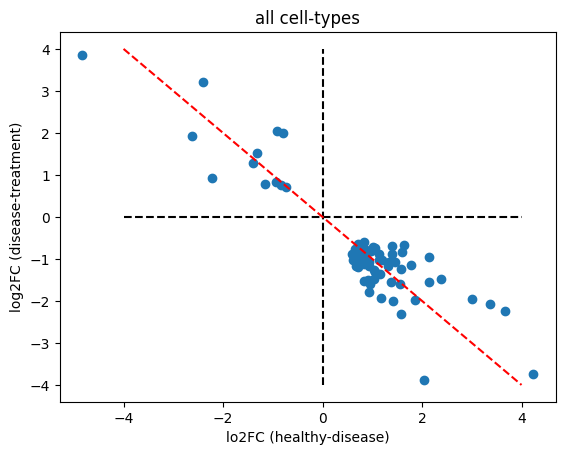

In [328]:
plt.figure()
plt.scatter(df_DGE_genes_filtered["log2fc_HC_UCNB"], df_DGE_genes_filtered['log2fc_UCNB_UCV'])
plt.plot([-4,4], [0,0], '--k')
plt.plot([0,0],[-4,4], '--k')
plt.plot([-4,4],[4,-4],'--r')
plt.xlabel('lo2FC (healthy-disease)') # HC vs UCNB
plt.ylabel('log2FC (disease-treatment)') # UCNB vs UCV
plt.title("all cell-types")

<AxesSubplot:>

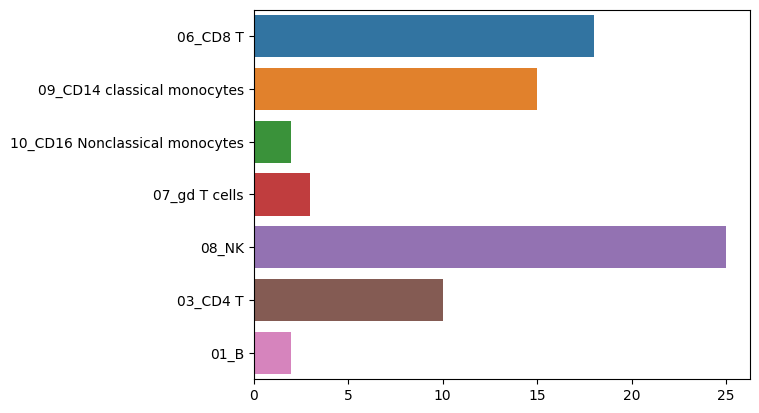

In [336]:
num_DEG_per_cell_type = []
# define the list of cell-types
list_cell_types = df_DGE_genes_filtered["cell_type"].unique()
num_cell_types = len(list_cell_types)

for i in range(0,num_cell_types):
    cell_type = list_cell_types[i]
    df_subset = df_DGE_genes_filtered[df_DGE_genes_filtered["cell_type"]==cell_type]
#     df_subset = df_subset[abs(df_subset["log2fc"])>2]
    num_DEG = len(df_subset)
    num_DEG_per_cell_type.append(num_DEG)

num_DEG_per_cell_type

sns.barplot(y=list_cell_types, x=num_DEG_per_cell_type)

In [390]:
df_DGE_genes_filtered

,gene,cell_type,pval_HC_UCNB,pval_UCNB_UCV,log2fc_HC_UCNB,log2fc_UCNB_UCV,log2fc_HC_UCV,pval_HC_UCV
0,MT-ATP8,06_CD8 T,1.796887e-08,1.474503e-21,1.171876,-1.920227,0.000000,NaN
1,TRGV9,06_CD8 T,9.161722e-06,1.167428e-13,0.756433,-1.060308,0.000000,NaN
2,GADD45B,06_CD8 T,4.101404e-03,6.988576e-14,0.931738,-1.794489,-0.782129,2.158968e-02
3,IER2,06_CD8 T,8.523705e-08,1.259225e-05,1.338640,-1.069399,0.757337,4.686024e-04
4,TRBV5-6,06_CD8 T,2.568732e-07,4.121046e-21,0.716029,-1.025455,0.000000,NaN
...,...,...,...,...,...,...,...,...
70,RPS26,03_CD4 T,2.146648e-58,2.082647e-41,1.141890,-1.020950,0.687900,6.126361e-13
71,SNHG8,03_CD4 T,2.257322e-04,2.035611e-08,1.037524,-1.474943,-0.686194,3.893026e-02
72,TUFM,03_CD4 T,2.549997e-02,7.480460e-05,0.672207,-0.968520,0.000000,NaN
73,GM2A,01_B,2.035737e-02,6.639683e-03,0.709436,-0.763511,0.000000,NaN


### coloring the scatter plot with cell-types

In [342]:
list_cell_types = df_DGE_genes_filtered["cell_type"].unique()
list_cell_types

array(['06_CD8 T', '09_CD14 classical monocytes',
       '10_CD16 Nonclassical monocytes', '07_gd T cells', '08_NK',
       '03_CD4 T', '01_B'], dtype=object)

In [353]:
colordict["06_CD8 T"]

'blue'

In [436]:
grouped = df_DGE_genes_filtered.groupby("cell_type")
grouped

for key, group in grouped:
    print(key)
    print(group)

01_B
     gene cell_type  log2fc_HC_UCNB  log2fc_UCNB_UCV  log2fc_HC_UCV  \
73   GM2A      01_B        0.709436        -0.763511         0.0000   
74  RPS26      01_B        2.136156        -0.963827         0.6879   

    pval_HC_UCNB  pval_UCNB_UCV   pval_HC_UCV  
73  2.035737e-02       0.006640           NaN  
74  1.342739e-20       0.000003  6.126361e-13  
03_CD4 T
       gene cell_type  log2fc_HC_UCNB  log2fc_UCNB_UCV  log2fc_HC_UCV  \
63  MT-ATP8  03_CD4 T        0.685183        -1.031152       0.000000   
64  GADD45B  03_CD4 T        1.572527        -1.232531      -0.782129   
65   CHCHD2  03_CD4 T        0.705667        -1.045151       0.000000   
66     IL32  03_CD4 T        0.667884        -1.175126       0.000000   
67     IER2  03_CD4 T        1.597601        -0.841076       0.757337   
68     CISH  03_CD4 T        0.655573        -0.765644       0.000000   
69    SNHG5  03_CD4 T        1.770890        -1.149130       0.720408   
70    RPS26  03_CD4 T        1.141890       

In [443]:
color=colordict["03_CD4 T"]
color

'tab:green'

Text(0.5, 1.0, 'all cell-types')

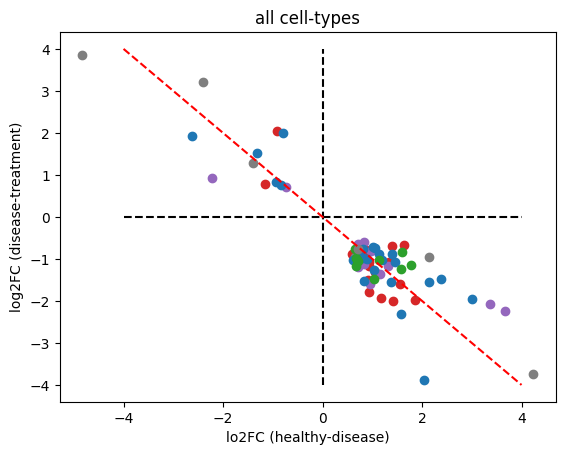

In [452]:
####### FIX the LEGEND issue!

# list of cell-types
list_cell_types = df_DGE_genes_filtered["cell_type"].unique()

colordict = {"01_B":"tab:grey",
             "03_CD4 T":"tab:green",
             "06_CD8 T":"tab:red",
             "07_gd T cells":"tab:grey",
             "08_NK":"tab:blue",
             "09_CD14 classical monocytes":"tab:purple",
             "10_CD16 Nonclassical monocytes":"tab:grey"
}

# fig, ax = plt.subplots(figsize=(6, 6))

# grouped = df_DGE_genes_filtered.groupby("cell_type")
# for key, group in grouped:
#     print(key)
#     group.plot(ax=ax, kind="scatter",x="log2fc_HC_UCNB", y="log2fc_UCNB_UCV", label=key,color=colordict[key])
for cell_type in list_cell_types:
    df_subset = df_DGE_genes_filtered[df_DGE_genes_filtered["cell_type"]==cell_type]
    df_subset.groupby("cell_type")
    plt.scatter(df_DGE_genes_filtered[df_DGE_genes_filtered["cell_type"]==cell_type]["log2fc_HC_UCNB"], 
                df_DGE_genes_filtered[df_DGE_genes_filtered["cell_type"]==cell_type]['log2fc_UCNB_UCV'],
                c=colordict[cell_type], label=colordict[cell_type])
    

# plt.plot([-4,4], [0,0], '--k')
# plt.plot([0,0],[-4,4], '--k')
# plt.plot([-4,4],[4,-4],'--r')
# plt.xlabel('lo2FC (healthy-disease)') # HC vs UCNB
# plt.ylabel('log2FC (disease-treatment)') # UCNB vs UCV
# plt.title("all cell-types")
# plt.legend(colordict, loc = 3)

# plt.figure()
# for cell_type in list_cell_types:
#     x = df_DGE_genes_filtered[df_DGE_genes_filtered["cell_type"]==cell_type]["log2fc_HC_UCNB"]
#     y = df_DGE_genes_filtered[df_DGE_genes_filtered["cell_type"]==cell_type]['log2fc_UCNB_UCV']
#     sns.scatterplot(x,y,hue=df_DGE_genes_filtered["cell_type"])

plt.plot([-4,4], [0,0], '--k')
plt.plot([0,0],[-4,4], '--k')
plt.plot([-4,4],[4,-4],'--r')
plt.xlabel('lo2FC (healthy-disease)') # HC vs UCNB
plt.ylabel('log2FC (disease-treatment)') # UCNB vs UCV
plt.title("all cell-types")
# plt.legend(colordict.keys(), loc = 3)

/home/yangjoon.kim/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

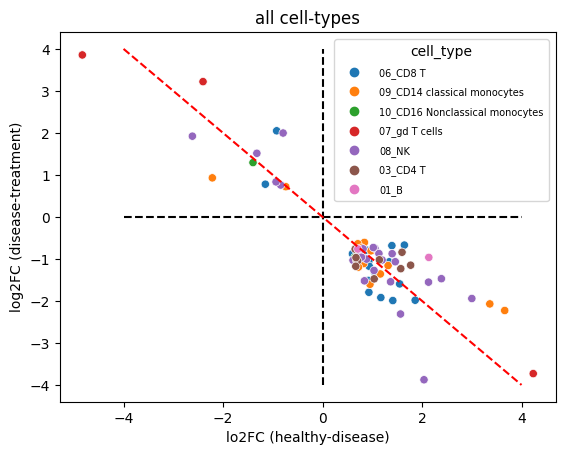

In [458]:
# grouped = df_DGE_genes_filtered.groupby("cell_type")
# for key, group in grouped:
#     print(key)
#     group.plot(ax=ax, kind="scatter",x="log2fc_HC_UCNB", y="log2fc_UCNB_UCV", label=key,color=colordict[key])
# for cell_type in list_cell_types:
#     df_subset = df_DGE_genes_filtered[df_DGE_genes_filtered["cell_type"]==cell_type]
#     df_subset.groupby("cell_type")
#     plt.scatter(df_DGE_genes_filtered[df_DGE_genes_filtered["cell_type"]==cell_type]["log2fc_HC_UCNB"], 
#                 df_DGE_genes_filtered[df_DGE_genes_filtered["cell_type"]==cell_type]['log2fc_UCNB_UCV'],
#                 c=colordict[cell_type], label=colordict[cell_type])
    

# plt.plot([-4,4], [0,0], '--k')
# plt.plot([0,0],[-4,4], '--k')
# plt.plot([-4,4],[4,-4],'--r')
# plt.xlabel('lo2FC (healthy-disease)') # HC vs UCNB
# plt.ylabel('log2FC (disease-treatment)') # UCNB vs UCV
# plt.title("all cell-types")
# plt.legend(colordict, loc = 3)

# plt.figure()

x = df_DGE_genes_filtered["log2fc_HC_UCNB"]
y = df_DGE_genes_filtered['log2fc_UCNB_UCV']
gfg = sns.scatterplot(x,y,hue=df_DGE_genes_filtered["cell_type"])

plt.plot([-4,4], [0,0], '--k')
plt.plot([0,0],[-4,4], '--k')
plt.plot([-4,4],[4,-4],'--r')
plt.xlabel('lo2FC (healthy-disease)') # HC vs UCNB
plt.ylabel('log2FC (disease-treatment)') # UCNB vs UCV
plt.title("all cell-types")
# for legend text
plt.setp(gfg.get_legend().get_texts(), fontsize='7') 
# plt.legend(colordict.keys(), loc = 3)

In [388]:
colordict = {"08_NK":"tab:blue",
             "06_CD8 T":"tab:red",
             "03_CD4 T":"tab:green",
             "09_CD14 classical monocytes":"tab:purple",
             "10_CD16 Nonclassical monocytes":"tab:grey",
             "07_gd T cells":"tab:grey",
             "01_B":"tab:grey"}

colordict

{'08_NK': 'tab:blue',
 '06_CD8 T': 'tab:red',
 '03_CD4 T': 'tab:green',
 '09_CD14 classical monocytes': 'tab:purple',
 '10_CD16 Nonclassical monocytes': 'tab:grey',
 '07_gd T cells': 'tab:grey',
 '01_B': 'tab:grey'}

### Coloring the scatter plot with H-T log2FCs

In [392]:
df_DGE_genes_filtered

,gene,cell_type,log2fc_HC_UCNB,log2fc_UCNB_UCV,log2fc_HC_UCV,pval_HC_UCNB,pval_UCNB_UCV,pval_HC_UCV
0,MT-ATP8,06_CD8 T,1.171876,-1.920227,0.000000,1.796887e-08,1.474503e-21,NaN
1,TRGV9,06_CD8 T,0.756433,-1.060308,0.000000,9.161722e-06,1.167428e-13,NaN
2,GADD45B,06_CD8 T,0.931738,-1.794489,-0.782129,4.101404e-03,6.988576e-14,2.158968e-02
3,IER2,06_CD8 T,1.338640,-1.069399,0.757337,8.523705e-08,1.259225e-05,4.686024e-04
4,TRBV5-6,06_CD8 T,0.716029,-1.025455,0.000000,2.568732e-07,4.121046e-21,NaN
...,...,...,...,...,...,...,...,...
70,RPS26,03_CD4 T,1.141890,-1.020950,0.687900,2.146648e-58,2.082647e-41,6.126361e-13
71,SNHG8,03_CD4 T,1.037524,-1.474943,-0.686194,2.257322e-04,2.035611e-08,3.893026e-02
72,TUFM,03_CD4 T,0.672207,-0.968520,0.000000,2.549997e-02,7.480460e-05,NaN
73,GM2A,01_B,0.709436,-0.763511,0.000000,2.035737e-02,6.639683e-03,NaN


## comparing the "recovery" of the gene expression after "Disease" + "Treatment"

Reasoning: We'd like to assess how much the "Treated" state is similar to the "Healthy" state after the disease and treatment.

For this, we'd like to compare the two quantities: (1) log2FC(H-D) + log2FC(D-T) and (2) log2FC(H-T). The second metric was computed independently from the first metric. In the ideal world, these two quantities would be very similar to each other. 

- ultimately, we'd like to check this for "All" genes (the whole transcriptome). But, we'd like to first see if this holds for the joint set of genes between the H-D and D-T.



In [395]:
df_DGE_genes_joint = pd.concat([df_DGE_genes_filtered, df_DGE_genes_filtered_out], axis=0)
df_DGE_genes_joint

,gene,cell_type,log2fc_HC_UCNB,log2fc_UCNB_UCV,log2fc_HC_UCV,pval_HC_UCNB,pval_UCNB_UCV,pval_HC_UCV
0,MT-ATP8,06_CD8 T,1.171876,-1.920227,0.000000,1.796887e-08,1.474503e-21,NaN
1,TRGV9,06_CD8 T,0.756433,-1.060308,0.000000,9.161722e-06,1.167428e-13,NaN
2,GADD45B,06_CD8 T,0.931738,-1.794489,-0.782129,4.101404e-03,6.988576e-14,2.158968e-02
3,IER2,06_CD8 T,1.338640,-1.069399,0.757337,8.523705e-08,1.259225e-05,4.686024e-04
4,TRBV5-6,06_CD8 T,0.716029,-1.025455,0.000000,2.568732e-07,4.121046e-21,NaN
...,...,...,...,...,...,...,...,...
12,GZMK,06_CD8 T,-1.124680,-2.299480,-3.415288,7.298280e-04,1.931335e-21,4.234641e-41
15,ZNF683,06_CD8 T,0.619338,2.041657,2.668478,1.758964e-10,1.956025e-34,8.662391e-71
26,IFITM3,09_CD14 classical monocytes,1.202637,0.976592,5.956415,1.171023e-05,6.973398e-03,1.941915e-14
35,HLA-C,10_CD16 Nonclassical monocytes,-0.664473,-0.884418,-0.667847,3.500519e-02,1.732854e-02,1.094969e-21


0.813225489693316

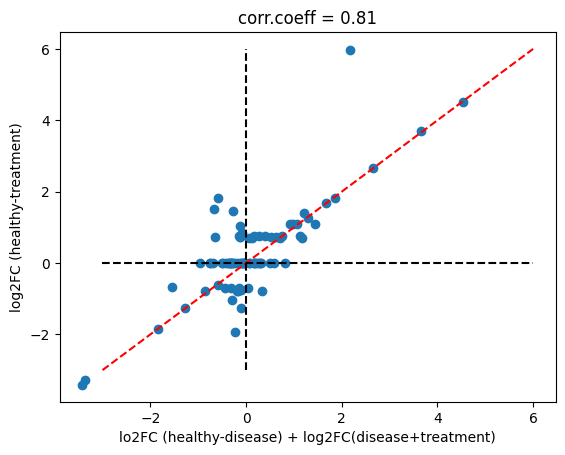

In [416]:
# plot the sum of log2FC values(from H-D and D-T) versus the log2FC (H-T)
plt.scatter(df_DGE_genes_joint["log2fc_HC_UCNB"]+df_DGE_genes_joint["log2fc_UCNB_UCV"], df_DGE_genes_joint["log2fc_HC_UCV"])
plt.plot([-3,6],[-3,6],'--r')
plt.plot([-3,6],[0,0],'--k')
plt.plot([0,0],[-3,6],'--k')

plt.xlabel('lo2FC (healthy-disease) + log2FC(disease+treatment)') # HC vs UCNB
plt.ylabel('log2FC (healthy-treatment)') # UCNB vs UCV
plt.title('corr.coeff = ' + str(np.round(corr_coeff[0,1],2)))

corr_coeff = np.corrcoef(df_DGE_genes_joint["log2fc_HC_UCNB"]+df_DGE_genes_joint["log2fc_UCNB_UCV"], df_DGE_genes_joint["log2fc_HC_UCV"])
corr_coeff[0,1]

In [415]:
np.round(corr_coeff[0,1],2)

0.81

### preliminary conclusion

What the plot above shows is that our estimation of the genes that recovered after the combination of disease and treatment is similar to the comparison between "healthy" and "treatment" directly.

In [449]:
df_DGE_genes_joint["sum_logFCs"] = df_DGE_genes_joint["log2fc_HC_UCNB"] + df_DGE_genes_joint["log2fc_UCNB_UCV"]
df_DGE_genes_joint

,gene,cell_type,log2fc_HC_UCNB,log2fc_UCNB_UCV,log2fc_HC_UCV,pval_HC_UCNB,pval_UCNB_UCV,pval_HC_UCV,sum_logFCs
0,MT-ATP8,06_CD8 T,1.171876,-1.920227,0.000000,1.796887e-08,1.474503e-21,NaN,-0.748351
1,TRGV9,06_CD8 T,0.756433,-1.060308,0.000000,9.161722e-06,1.167428e-13,NaN,-0.303875
2,GADD45B,06_CD8 T,0.931738,-1.794489,-0.782129,4.101404e-03,6.988576e-14,2.158968e-02,-0.862750
3,IER2,06_CD8 T,1.338640,-1.069399,0.757337,8.523705e-08,1.259225e-05,4.686024e-04,0.269241
4,TRBV5-6,06_CD8 T,0.716029,-1.025455,0.000000,2.568732e-07,4.121046e-21,NaN,-0.309425
...,...,...,...,...,...,...,...,...,...
12,GZMK,06_CD8 T,-1.124680,-2.299480,-3.415288,7.298280e-04,1.931335e-21,4.234641e-41,-3.424161
15,ZNF683,06_CD8 T,0.619338,2.041657,2.668478,1.758964e-10,1.956025e-34,8.662391e-71,2.660995
26,IFITM3,09_CD14 classical monocytes,1.202637,0.976592,5.956415,1.171023e-05,6.973398e-03,1.941915e-14,2.179229
35,HLA-C,10_CD16 Nonclassical monocytes,-0.664473,-0.884418,-0.667847,3.500519e-02,1.732854e-02,1.094969e-21,-1.548890


In [450]:
df_DGE_genes_joint.head(84)

,gene,cell_type,log2fc_HC_UCNB,log2fc_UCNB_UCV,log2fc_HC_UCV,pval_HC_UCNB,pval_UCNB_UCV,pval_HC_UCV,sum_logFCs
0,MT-ATP8,06_CD8 T,1.171876,-1.920227,0.000000,1.796887e-08,1.474503e-21,NaN,-0.748351
1,TRGV9,06_CD8 T,0.756433,-1.060308,0.000000,9.161722e-06,1.167428e-13,NaN,-0.303875
2,GADD45B,06_CD8 T,0.931738,-1.794489,-0.782129,4.101404e-03,6.988576e-14,2.158968e-02,-0.862750
3,IER2,06_CD8 T,1.338640,-1.069399,0.757337,8.523705e-08,1.259225e-05,4.686024e-04,0.269241
4,TRBV5-6,06_CD8 T,0.716029,-1.025455,0.000000,2.568732e-07,4.121046e-21,NaN,-0.309425
...,...,...,...,...,...,...,...,...,...
12,GZMK,06_CD8 T,-1.124680,-2.299480,-3.415288,7.298280e-04,1.931335e-21,4.234641e-41,-3.424161
15,ZNF683,06_CD8 T,0.619338,2.041657,2.668478,1.758964e-10,1.956025e-34,8.662391e-71,2.660995
26,IFITM3,09_CD14 classical monocytes,1.202637,0.976592,5.956415,1.171023e-05,6.973398e-03,1.941915e-14,2.179229
35,HLA-C,10_CD16 Nonclassical monocytes,-0.664473,-0.884418,-0.667847,3.500519e-02,1.732854e-02,1.094969e-21,-1.548890
